In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import json
import pandas as pd
import numpy as np
from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir(os.path.dirname(os.getcwd()))

import debias_vsi as dv

In [3]:
df = dv.get_vsi_with_scores()
df

Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/bld_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 14233.95it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/blk_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15661.59it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15829.27it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15713.96it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/gemini-1.5_pro.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 13786.21it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/llava_vid_7b.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 14797.13it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data

Loaded 5130 files. Loading VSI-Bench...


id      dataset    scene_name    question_type  \
0        0  arkitscenes      41069025  object_counting   
1        1  arkitscenes      41069025  object_counting   
2        2  arkitscenes      41069043  object_counting   
3        3  arkitscenes      41125700  object_counting   
4        4  arkitscenes      41125700  object_counting   
...    ...          ...           ...              ...   
5125  5151      scannet  scene0196_00   route_planning   
5126  5152      scannet  scene0378_01   route_planning   
5127  5153  arkitscenes      47331654   route_planning   
5128  5154  arkitscenes      42445026   route_planning   
5129  5155  arkitscenes      42446529   route_planning   

                                               question ground_truth  \
0                   How many table(s) are in this room?            4   
1                   How many chair(s) are in this room?            2   
2                   How many table(s) are in this room?            2   
3                    How many sofa(s) are in this room?            2   
4                   How many table(s) are in this room?            3   
...                                                 ...          ...   
5125  You are a robot beginning at the trash bin nea...            C   
5126  You are a robot beginning at the door and faci...            A   
5127  You are a robot beginning at the heater and fa...            D   
5128  You are a robot beginning at the doorframe and...            C   
5129  You are a robot beginning at the closet and fa...            A   

                                                options  \
0                                                  None   
1                                                  None   
2                                                  None   
3                                                  None   
4                                                  None   
...                                                 ...   
5125  [A. Turn Right, Turn Left, B. Turn Right, Turn...   
5126  [A. Turn Left, Turn Left, Turn Left, B. Turn L...   
5127  [A. Turn Left, Turn Right, B. Turn Back, Turn ...   
5128        [A. Turn Left, B. Turn Back, C. Turn Right]   
5129  [A. Turn Right, Turn Left, Turn Left, B. Turn ...   

      bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  ...  \
0                       0.0                    0.0         0.1  ...   
1                       0.1                    0.1         1.0  ...   
2                       0.1                    0.1         1.0  ...   
3                       0.1                    0.1         1.0  ...   
4                       0.0                    0.0         0.4  ...   
...                     ...                    ...         ...  ...   
5125                    0.0                    0.0         0.0  ...   
5126                    0.0                    0.0         0.0  ...   
5127                    0.0                    0.0         0.0  ...   
5128                    1.0                    1.0         1.0  ...   
5129                    0.0                    1.0         1.0  ...   

      rgb_sims_3q_25k  rgb_sims_3q_25k_blind  rgb_sims_manV2_5k  \
0                 0.1                    0.0                0.1   
1                 0.1                    0.1                0.1   
2                 1.0                    0.1                1.0   
3                 0.1                    0.1                0.1   
4                 0.4                    0.0                0.4   
...               ...                    ...                ...   
5125              0.0                    0.0                0.0   
5126              0.0                    0.0                0.0   
5127              0.0                    0.0                0.0   
5128              1.0                    1.0                1.0   
5129              1.0                    1.0                1.0   

      rgb_sims_manV2_5k_blind  vsi_train_10k  vsi_train_10k_blind  \
0         

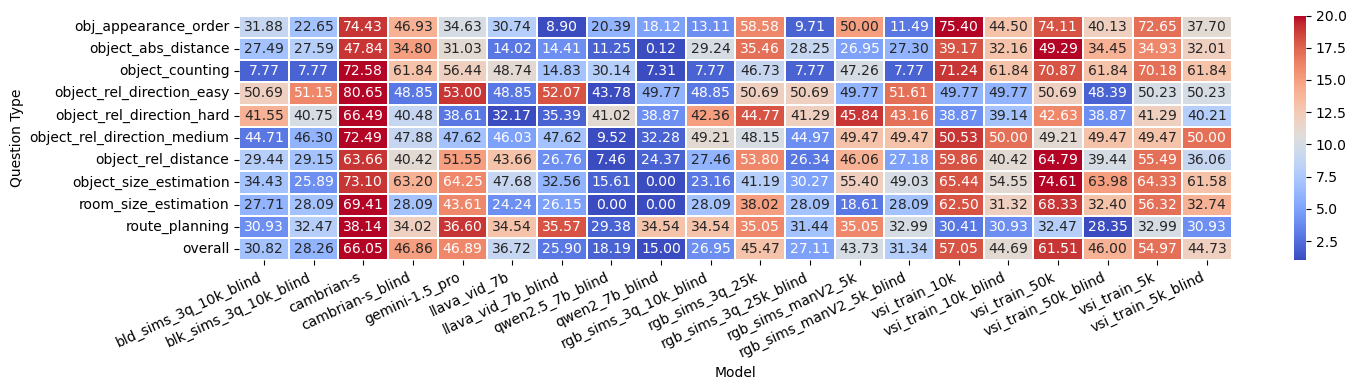

In [4]:
dv.visualize_model_scores(df);

## Appearance Order

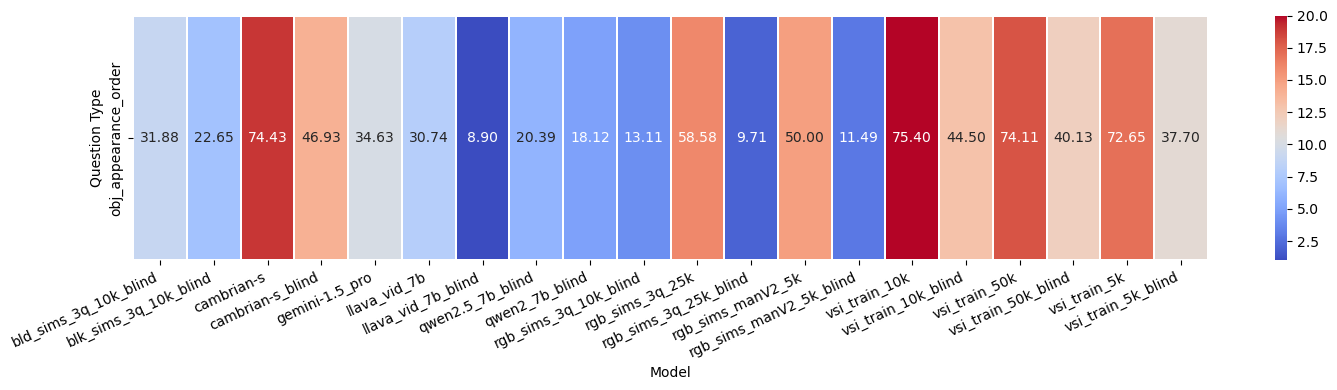

In [5]:
dv.visualize_model_scores(df.loc[df["question_type"] == "obj_appearance_order"]);

In [6]:
qdf = df[df["question_type"] == "obj_appearance_order"].copy()
qdf["question"].iloc[0]

'What will be the first-time appearance order of the following categories in the video: ceiling light, cup, heater, door?'

In [7]:
qdf["options"].iloc[0]

array(['A. cup, door, heater, ceiling light',
       'B. ceiling light, door, cup, heater',
       'C. heater, cup, door, ceiling light',
       'D. ceiling light, cup, heater, door'], dtype=object)

In [8]:
import re

# question format: "What is the length of the longest dimension (length, width, or height) of the OBJECT, measured in centimeters?'"
# question format: "How many OBJECT(s) are in this room?"


# app_df.loc[:, "gt_idx"] = app_df.loc[:, "ground_truth"].apply(lambda x: "ABCD".index(x))
# app_df.loc[:, "gt_option"] = app_df.apply(lambda row: row["options"][row["gt_idx"]].split(". ")[-1], axis=1)
# app_df.loc[:, "gt_1"] = app_df.loc[:, "gt_option"].apply(lambda x: x.split(", ")[0])
# app_df.loc[:, "gt_2"] = app_df.loc[:, "gt_option"].apply(lambda x: x.split(", ")[1] if len(x.split(", ")) > 1 else None)
# app_df.loc[:, "gt_3"] = app_df.loc[:, "gt_option"].apply(lambda x: x.split(", ")[2] if len(x.split(", ")) > 2 else None)
# app_df.loc[:, "gt_4"] = app_df.loc[:, "gt_option"].apply(lambda x: x.split(", ")[3] if len(x.split(", ")) > 3 else None)

qdf["gt_idx"] = qdf["ground_truth"].apply(lambda x: "ABCD".index(x))
qdf["gt_option"] = qdf.apply(lambda row: row["options"][row["gt_idx"]].split(". ")[-1], axis=1)

gt_objects_list_flat = [] # For overall frequency
# Assume sequences are always length 4
for i in range(4):
    gt_obj_i = qdf["gt_option"].apply(lambda x: x.split(", ")[i].strip())
    qdf[f"gt_obj_{i+1}"] = gt_obj_i # Add to dataframe
    gt_objects_list_flat.extend(gt_obj_i.dropna().tolist()) # Add to flat list

    qdf[f"opt_seq_{i+1}"] = qdf["options"].apply(lambda x: x[i].split(". ", 1)[1].split(", "))

gt_cols = [f"gt_obj_{i+1}" for i in range(4)]

# # Parse options robustly
# def parse_seq(option_str):
#     return [o.strip() for o in option_str.split('. ', 1)[1].split(',')]

# parsed_options_lists = qdf["options"].apply(
#     lambda opt_list: [parse_seq(opt_str) for opt_str in opt_list]
# )

# qdf['parsed_options'] = parsed_options_lists.tolist() # Store the lists [ [A_objs], [B_objs], [C_objs], [D_objs] ]
# qdf[['opt_1', 'opt_2', 'opt_3', 'opt_4']] = pd.DataFrame(qdf['parsed_options'].tolist(), index=qdf.index)
qdf

# qdf["gt_obj_1"].value_counts().head(5), qdf["gt_obj_2"].value_counts().head(5), qdf["gt_obj_3"].value_counts().head(5), qdf["gt_obj_4"].value_counts().head(5)

id    dataset    scene_name         question_type  \
2701  2713  scannetpp    45b0dac5e3  obj_appearance_order   
2702  2714  scannetpp    45b0dac5e3  obj_appearance_order   
2703  2715  scannetpp    5942004064  obj_appearance_order   
2704  2716  scannetpp    5942004064  obj_appearance_order   
2705  2717  scannetpp    5942004064  obj_appearance_order   
...    ...        ...           ...                   ...   
4214  4234    scannet  scene0231_00  obj_appearance_order   
4215  4235    scannet  scene0231_00  obj_appearance_order   
4216  4236    scannet  scene0231_00  obj_appearance_order   
4217  4237    scannet  scene0231_00  obj_appearance_order   
4218  4238    scannet  scene0231_00  obj_appearance_order   

                                               question ground_truth  \
2701  What will be the first-time appearance order o...            A   
2702  What will be the first-time appearance order o...            C   
2703  What will be the first-time appearance order o...            D   
2704  What will be the first-time appearance order o...            B   
2705  What will be the first-time appearance order o...            B   
...                                                 ...          ...   
4214  What will be the first-time appearance order o...            D   
4215  What will be the first-time appearance order o...            A   
4216  What will be the first-time appearance order o...            B   
4217  What will be the first-time appearance order o...            A   
4218  What will be the first-time appearance order o...            B   

                                                options  \
2701  [A. cup, door, heater, ceiling light, B. ceili...   
2702  [A. toilet, door, ceiling light, heater, B. he...   
2703  [A. basket, blanket, toilet, ceiling light, B....   
2704  [A. basket, table, bed, toilet, B. toilet, bas...   
2705  [A. basket, door, pillow, ceiling light, B. do...   
...                                                 ...   
4214  [A. plant, lamp, chair, sofa, B. chair, plant,...   
4215  [A. microwave, window, sofa, plant, B. plant, ...   
4216  [A. pillow, refrigerator, plant, lamp, B. refr...   
4217  [A. counter, window, sofa, plant, B. window, s...   
4218  [A. pillow, counter, window, plant, B. counter...   

      bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  ...  gt_idx  \
2701                    0.0                    0.0         1.0  ...       0   
2702                    0.0                    0.0         1.0  ...       2   
2703                    1.0                    1.0         1.0  ...       3   
2704                    1.0                    1.0         1.0  ...       1   
2705                    1.0                    1.0         1.0  ...       1   
...                     ...                    ...         ...  ...     ...   
4214                    0.0                    0.0         0.0  ...       3   
4215                    1.0                    1.0         1.0  ...       0   
4216                    1.0                    1.0         1.0  ...       1   
4217                    0.0                    0.0         1.0  ...       0   
4218                    1.0                    1.0         1.0  ...       1   

                                   gt_option      gt_obj_1  \
2701        cup, door, heater, ceiling light           cup   
2702     toilet, door, heater, ceiling light        toilet   
2703  toilet, basket, blanket, ceiling light        toilet   
2704              toilet, basket, bed, table        toilet   
2705     door, basket, pillow, ceiling light          door   
...                                      ...           ...   
4214                chair, lamp, sofa, plant         chair   
4215          microwave, window, sofa, plant     microwave   
4216       refrigerator, lamp, pillow, plant  refrigerator   
4217            counter, window, sofa, plant       counter   
4218          counter, window, pillow, plant       counter   

       

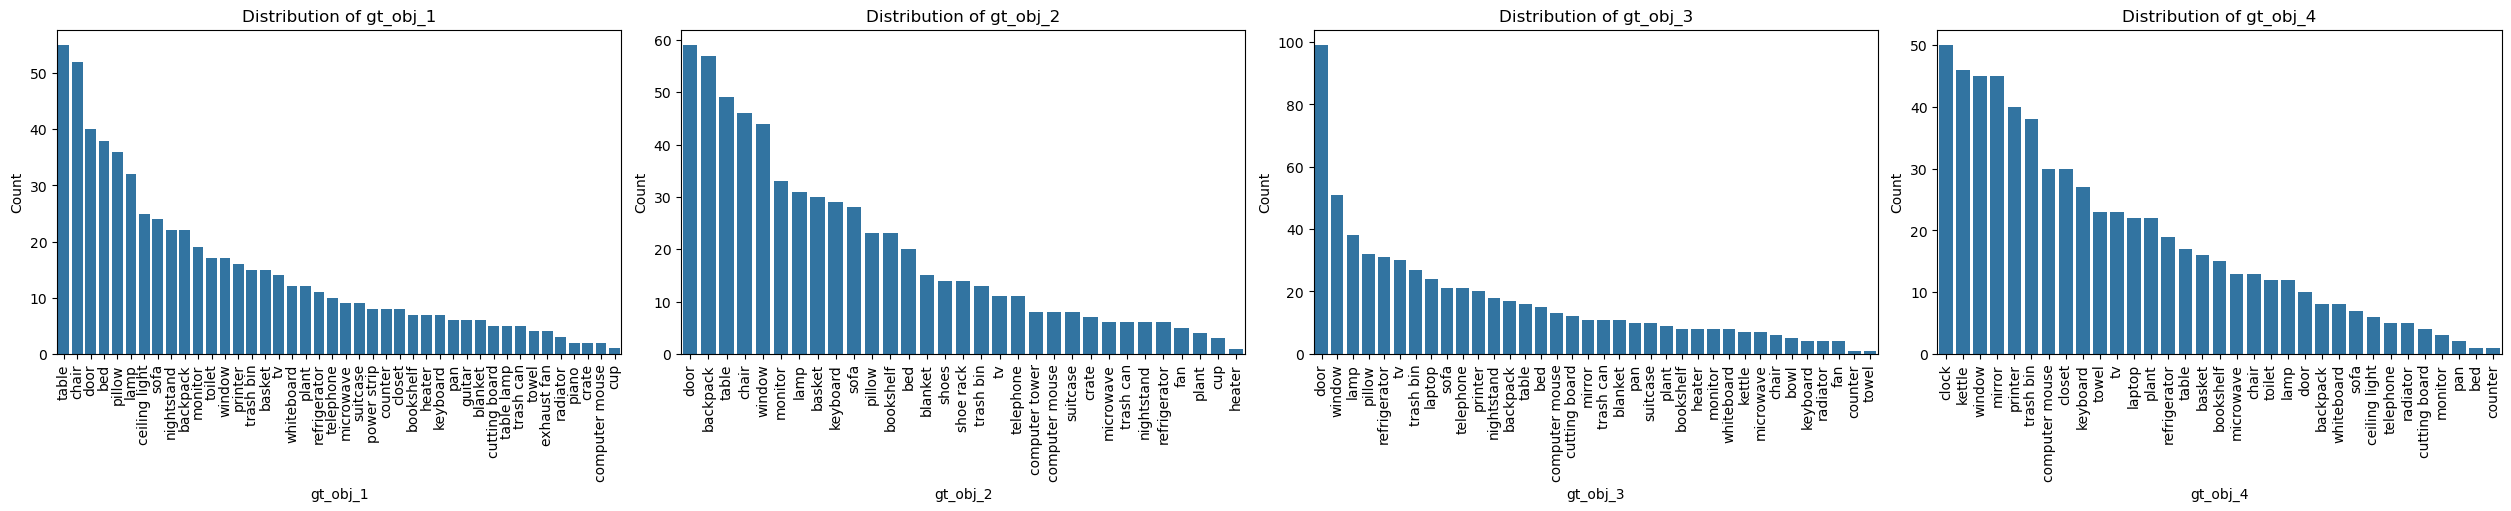

In [9]:
cols = ["gt_obj_1", "gt_obj_2", "gt_obj_3", "gt_obj_4"]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(25, 5), constrained_layout=True)


for i, col in enumerate(cols):
    sns.countplot(data=qdf, x=col, order=qdf[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

In [10]:
qdf.iloc[0]

id                                                                      2713
dataset                                                            scannetpp
scene_name                                                        45b0dac5e3
question_type                                           obj_appearance_order
question                   What will be the first-time appearance order o...
ground_truth                                                               A
options                    [A. cup, door, heater, ceiling light, B. ceili...
bld_sims_3q_10k_blind                                                    0.0
blk_sims_3q_10k_blind                                                    0.0
cambrian-s                                                               1.0
cambrian-s_blind                                                         0.0
gemini-1.5_pro                                                           0.0
llava_vid_7b                                                             0.0

In [11]:
qdf["ground_truth"].value_counts()

ground_truth
B    156
A    155
C    154
D    153
Name: count, dtype: int64

In [12]:
len(qdf)

618

In [13]:
pd.set_option('display.max_rows', 100)
budget = 150
budget = 200
budget = 300
# budget = 400

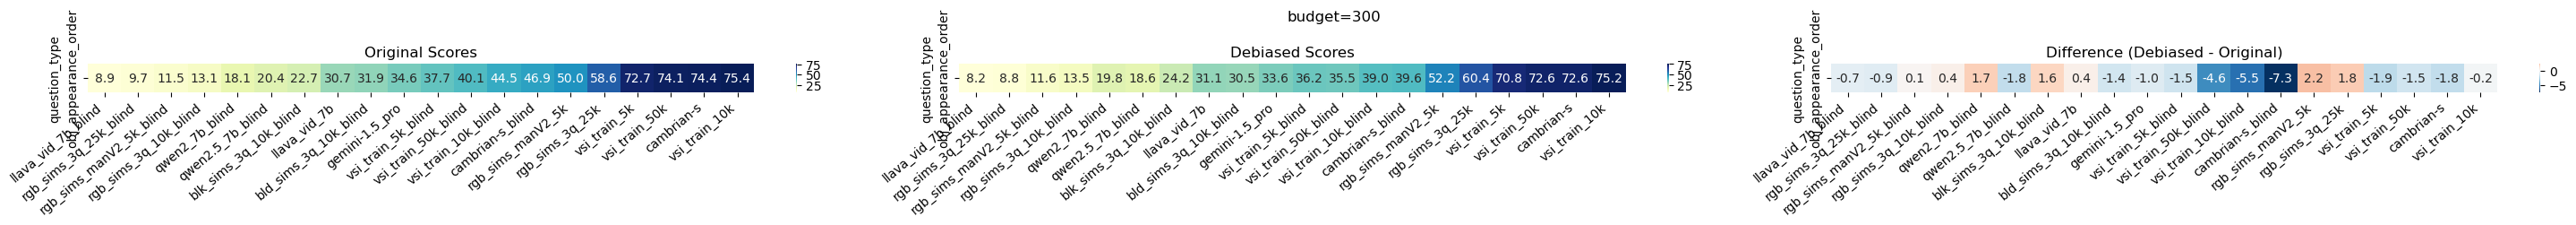

In [14]:
ids = dv.filter_obj_appearance_order(qdf, budget=budget)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}");

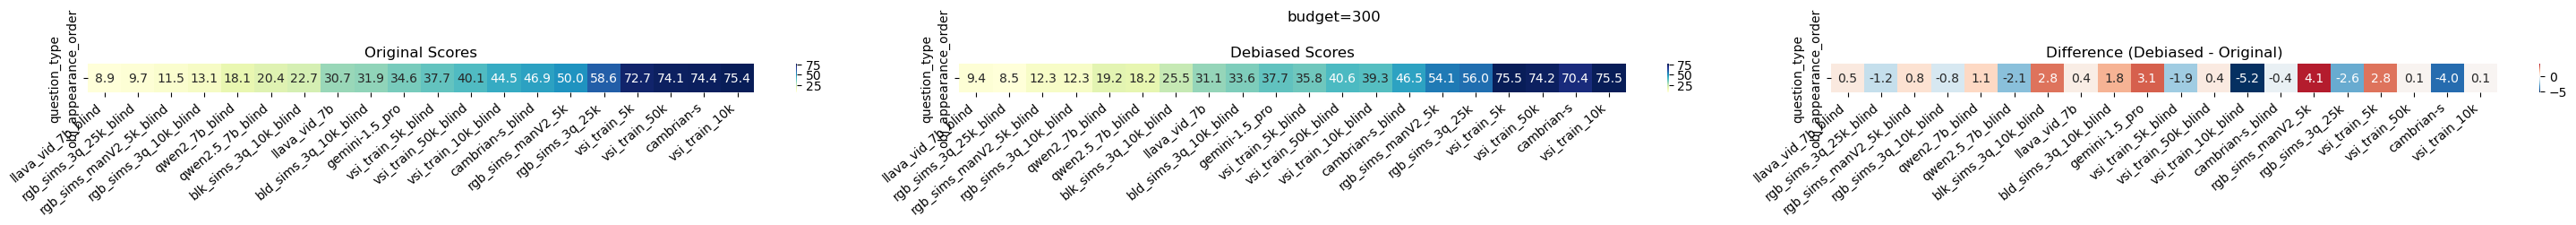

In [15]:
ids = dv.filter_app_order_position_bias(qdf, budget=budget)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}");

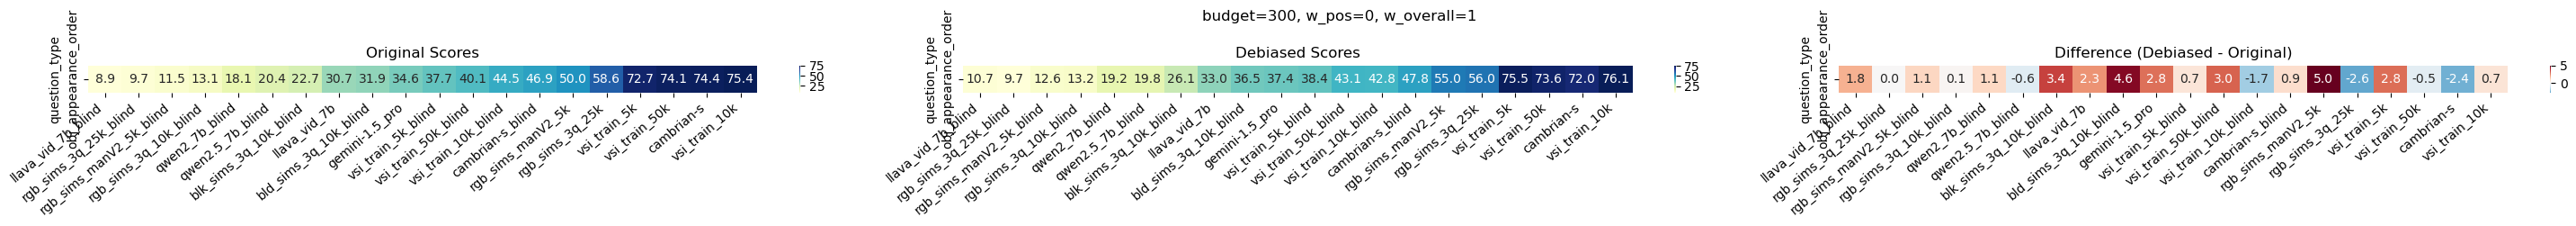

In [16]:
ids = dv.filter_app_order_scored(qdf, budget=budget, w_pos=0, w_overall=1)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, w_pos=0, w_overall=1");

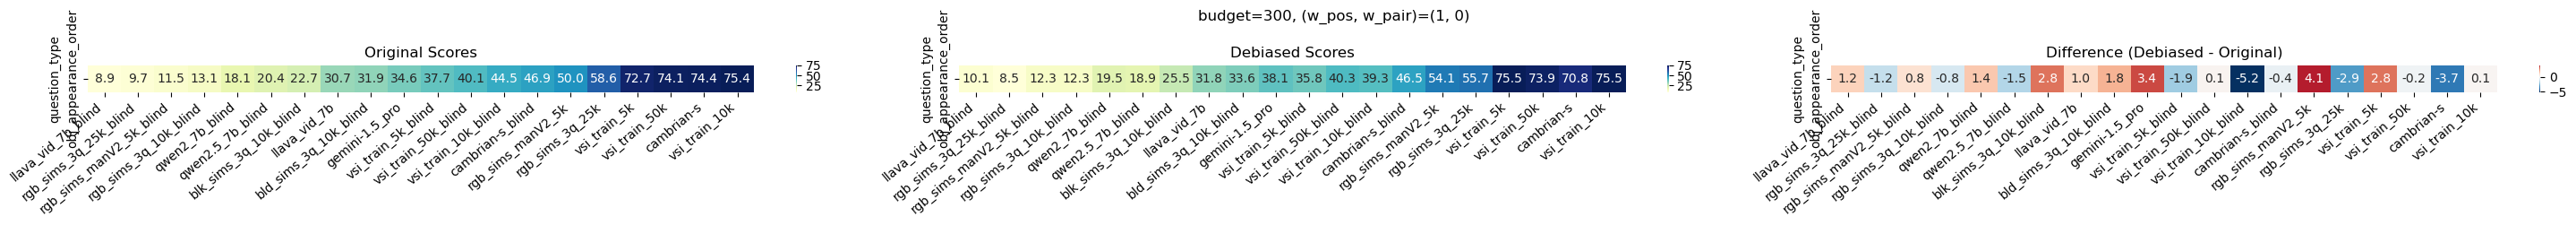

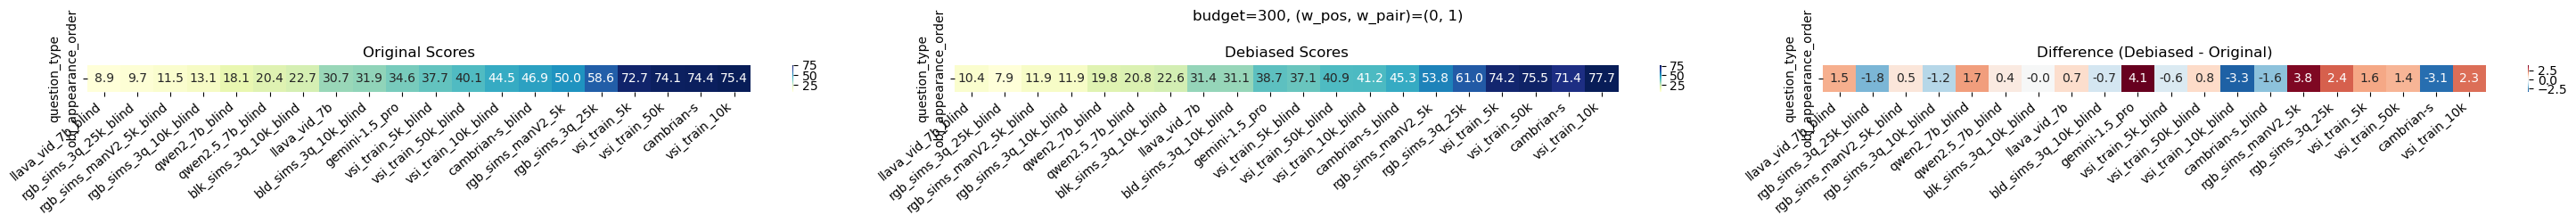

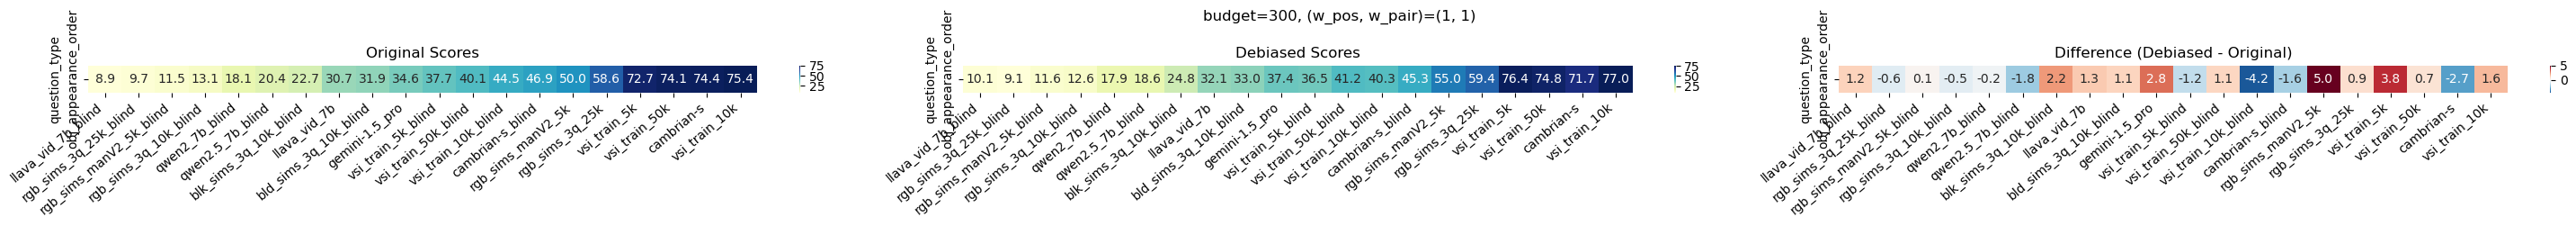

In [17]:
for w_pos, w_pair in (
    (1, 0),
    (0, 1),
    (1, 1),
):
    ids = dv.filter_app_order_scored_v2(qdf, budget=budget, w_pos=w_pos, w_pair=w_pair)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, (w_pos, w_pair)=({w_pos}, {w_pair})");

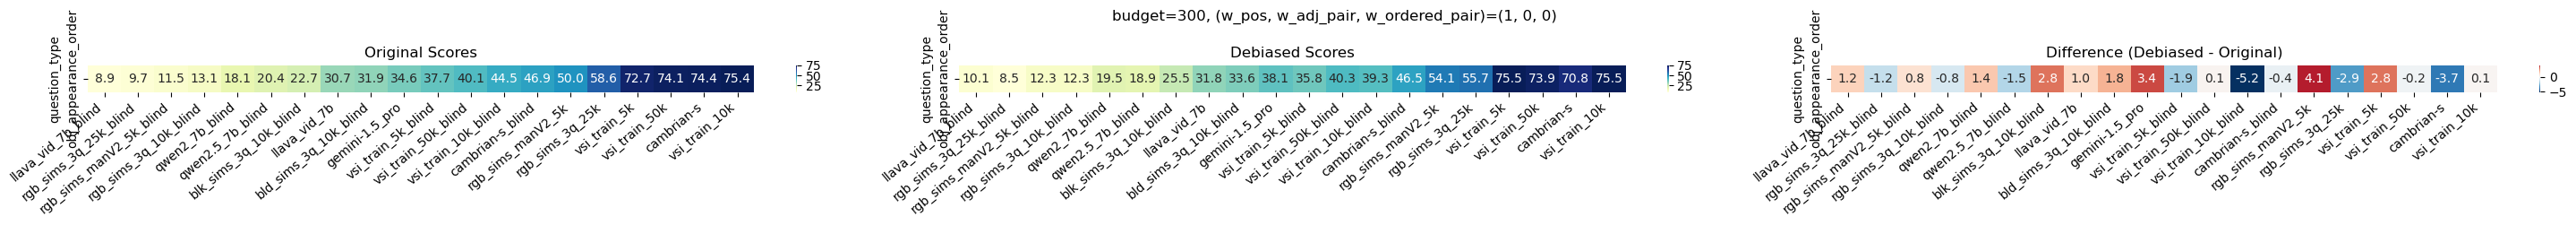

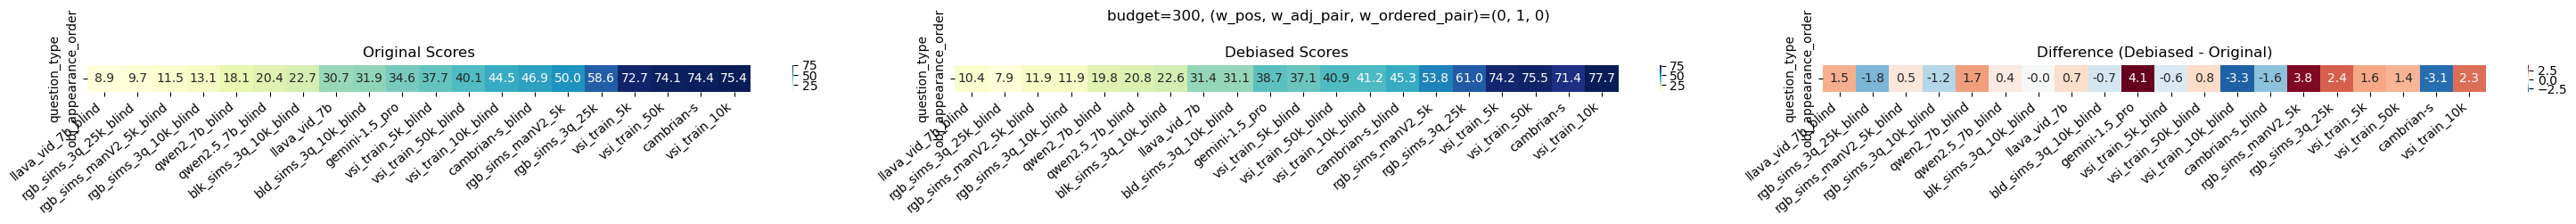

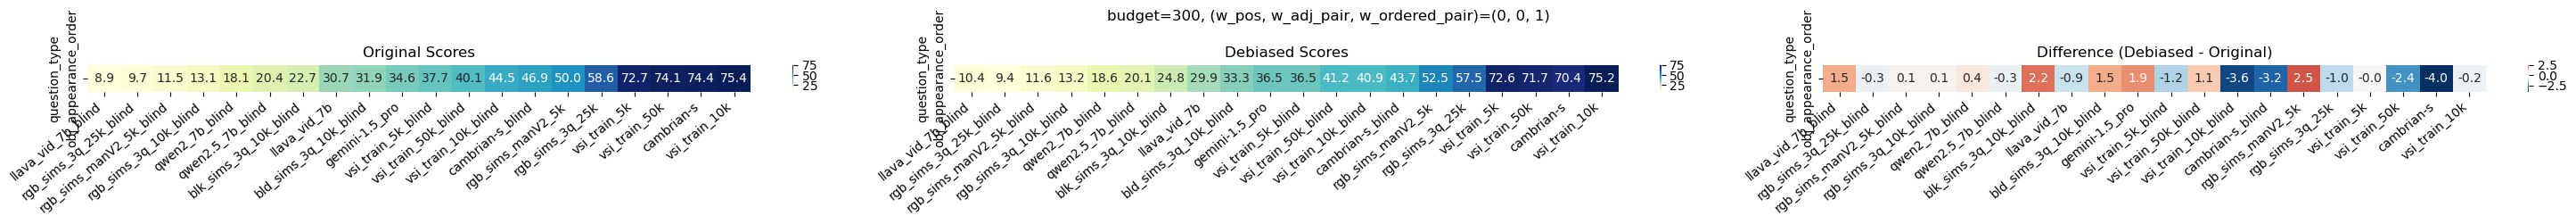

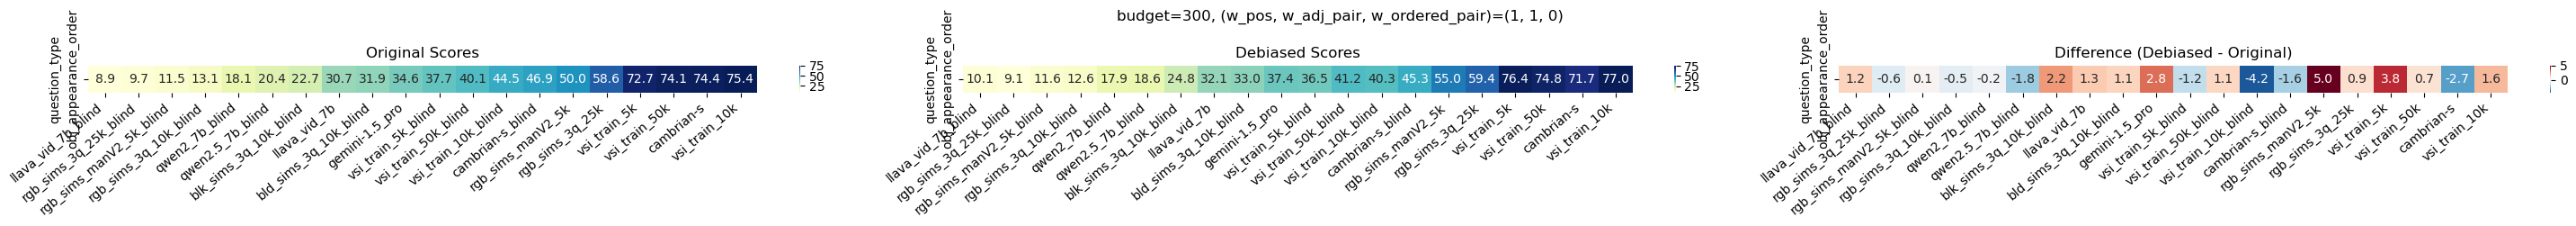

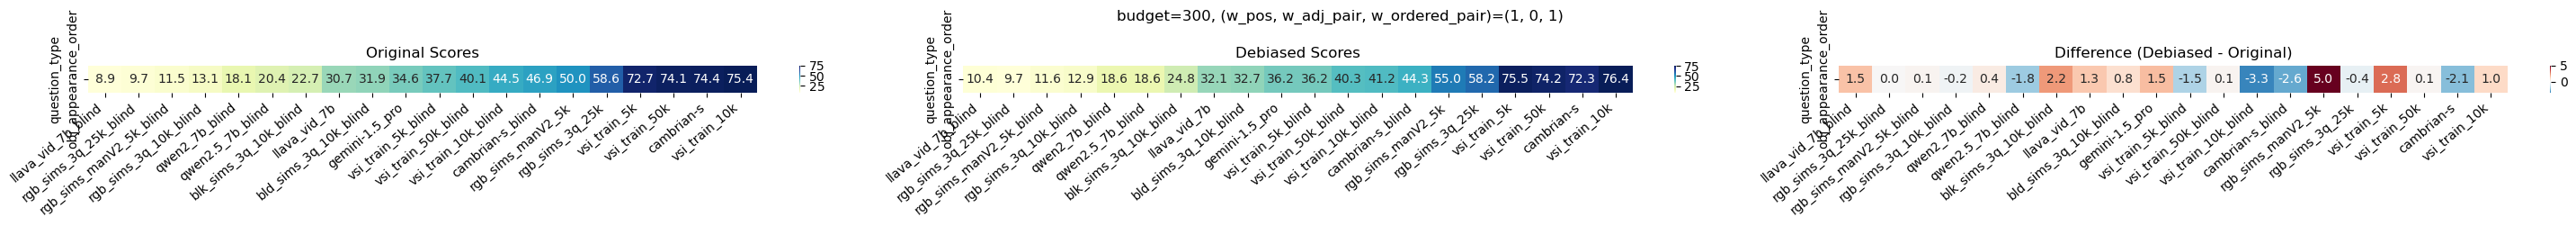

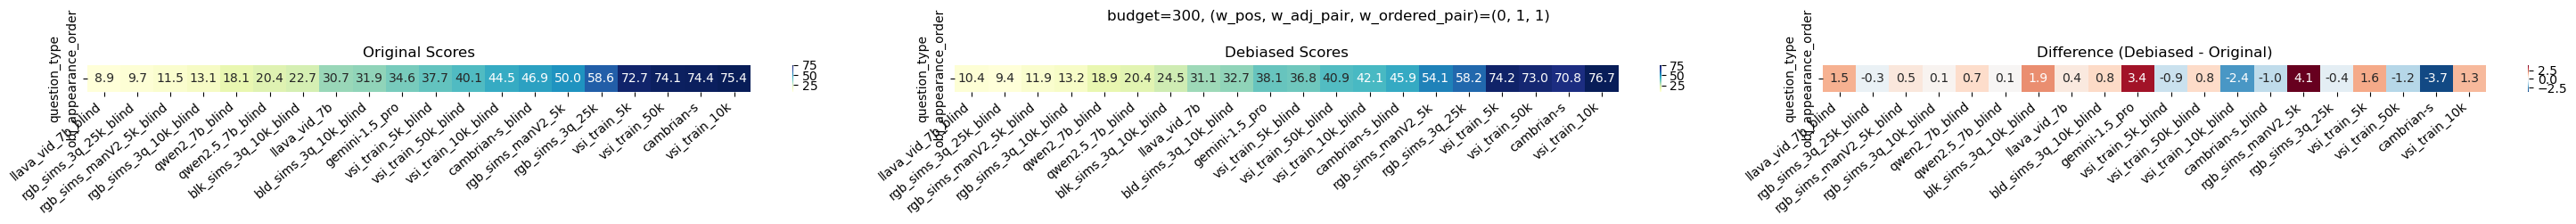

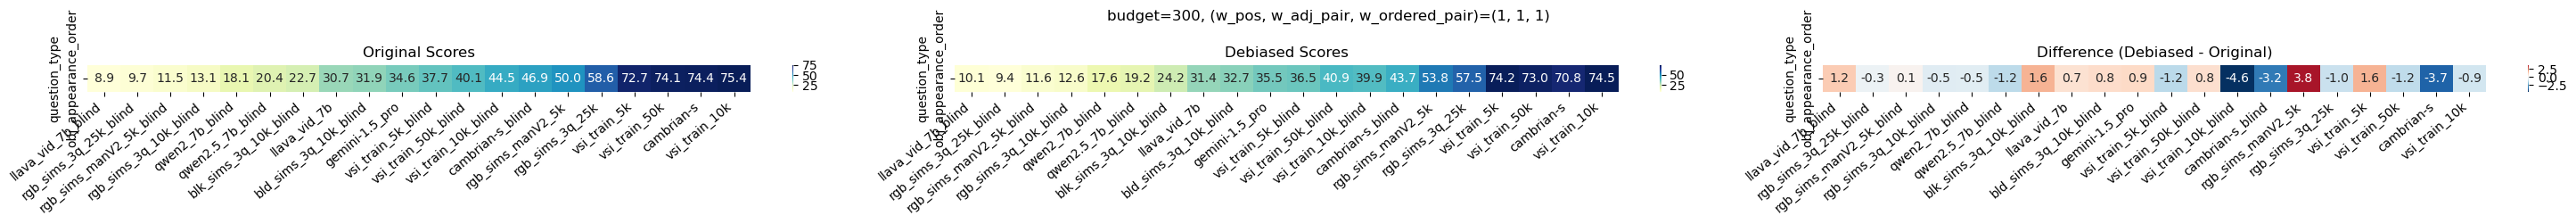

In [18]:
for w_pos, w_adj_pair, w_ordered_pair in (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (1, 1, 0),
    (1, 0, 1),
    (0, 1, 1),
    (1, 1, 1),
):
    ids = dv.filter_app_order_scored_v3(qdf, budget=budget, w_pos=w_pos, w_adj_pair=w_adj_pair, w_ordered_pair=w_ordered_pair)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, (w_pos, w_adj_pair, w_ordered_pair)=({w_pos}, {w_adj_pair}, {w_ordered_pair})");

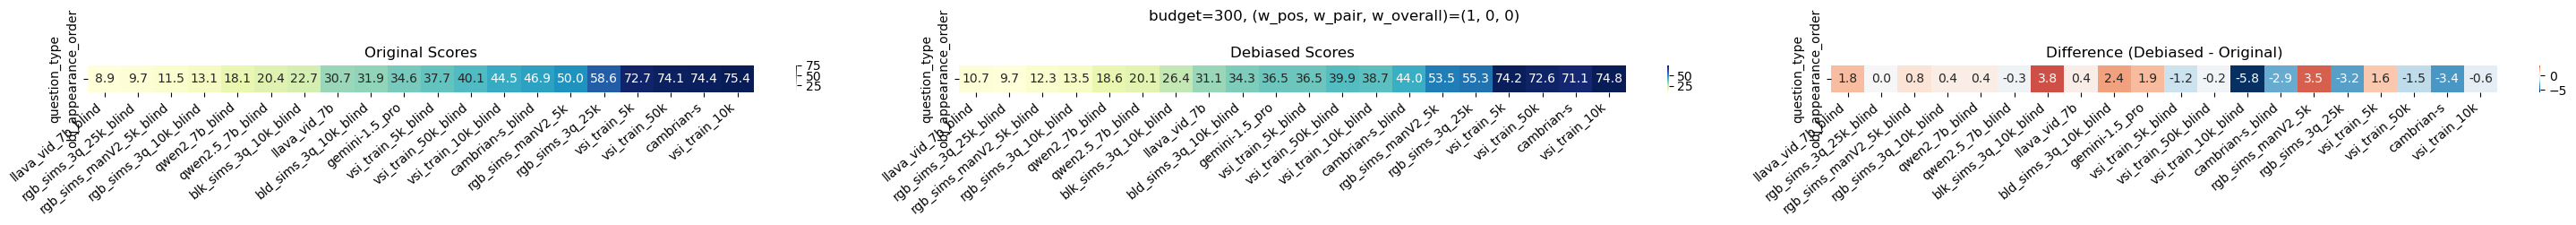

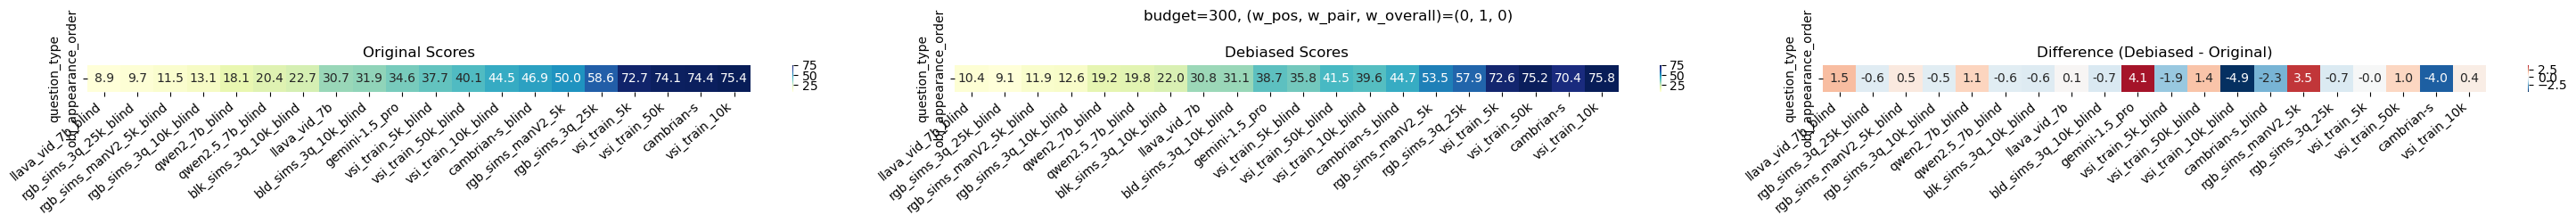

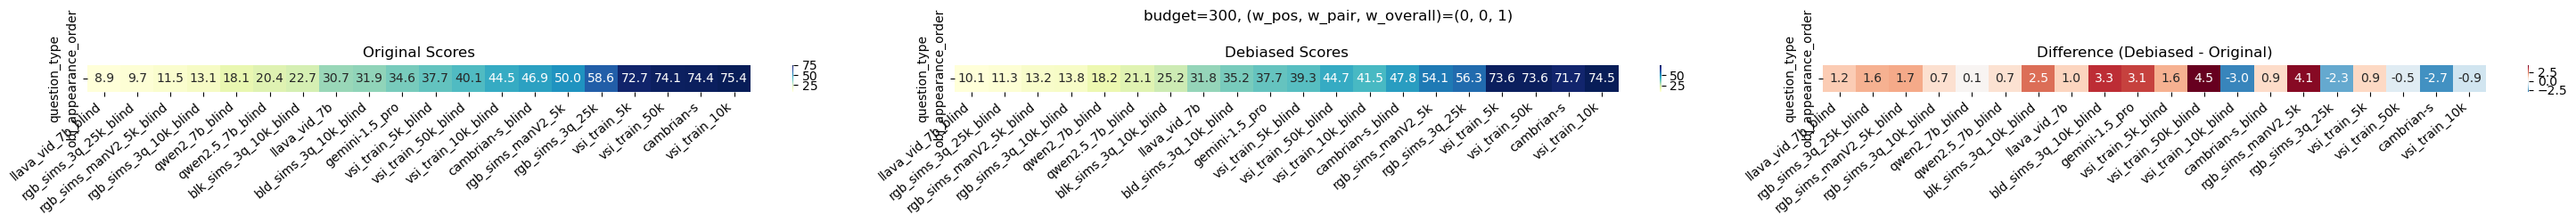

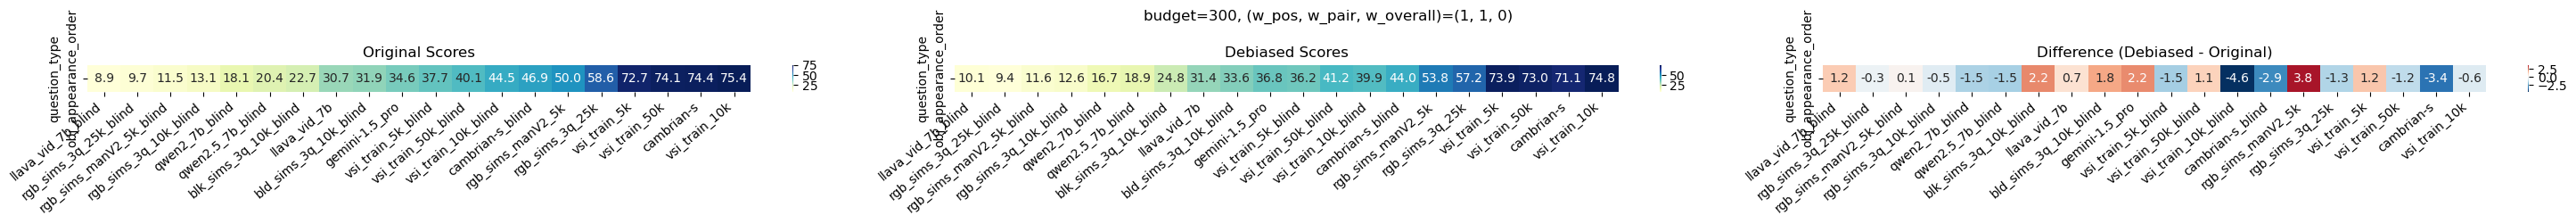

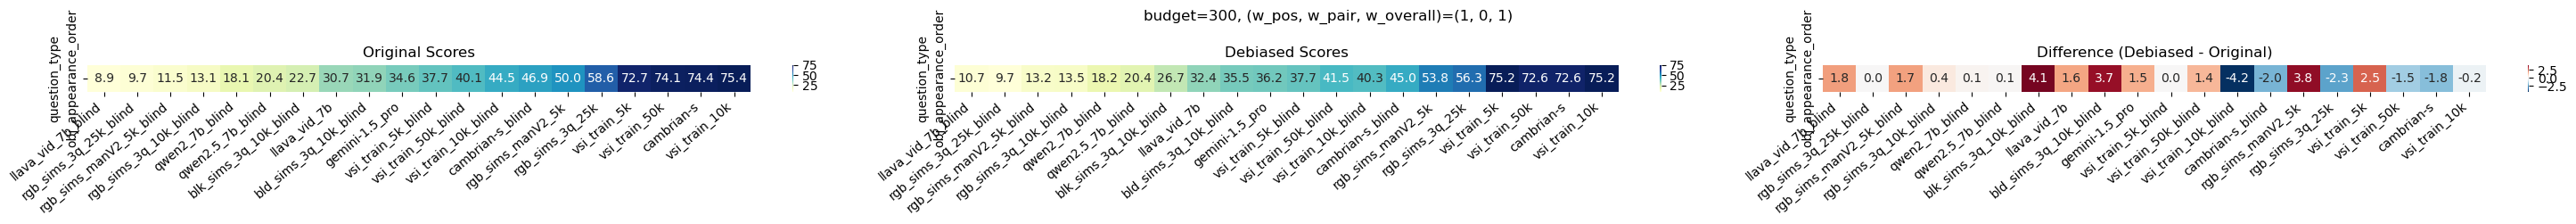

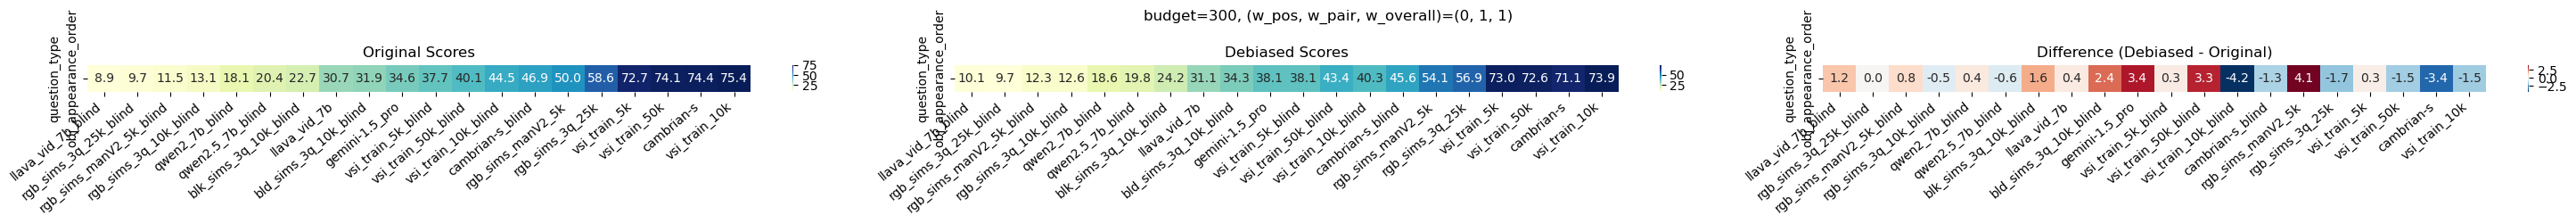

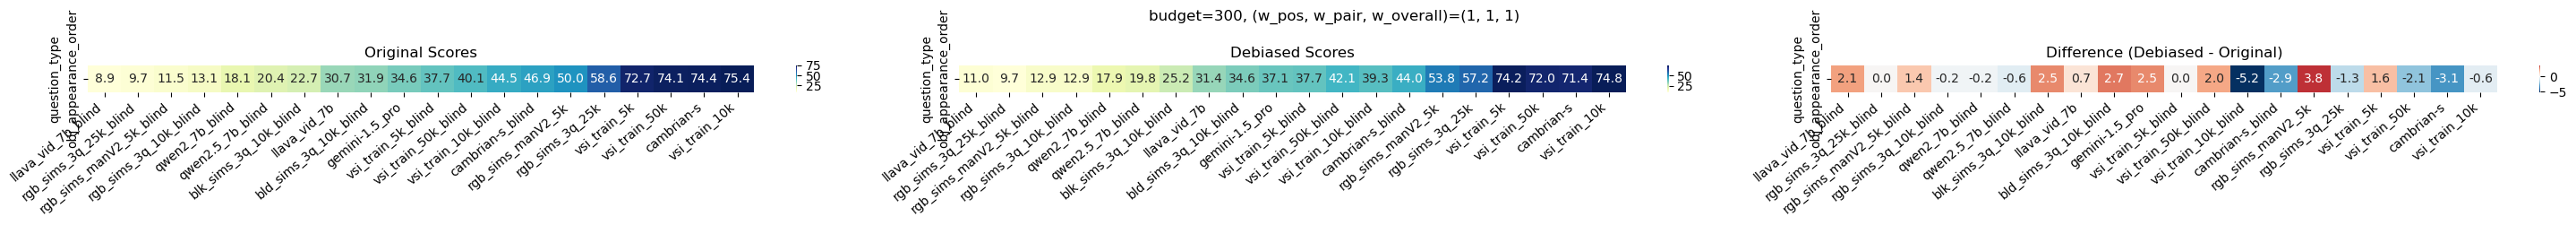

In [19]:
for w_pos, w_pair, w_overall in (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (1, 1, 0),
    (1, 0, 1),
    (0, 1, 1),
    (1, 1, 1),
):
    ids = dv.filter_app_order_scored_v4(qdf, budget=budget, w_pos=w_pos, w_pair=w_pair, w_overall=w_overall)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, (w_pos, w_pair, w_overall)=({w_pos}, {w_pair}, {w_overall})");

In [20]:
df_with_scores = dv.get_app_order_relative_score(df, w_pos=1.0, w_pair=1.0)
df_with_scores

id    dataset    scene_name         question_type  \
0    2713  scannetpp    45b0dac5e3  obj_appearance_order   
1    2714  scannetpp    45b0dac5e3  obj_appearance_order   
2    2715  scannetpp    5942004064  obj_appearance_order   
3    2716  scannetpp    5942004064  obj_appearance_order   
4    2717  scannetpp    5942004064  obj_appearance_order   
..    ...        ...           ...                   ...   
613  4234    scannet  scene0231_00  obj_appearance_order   
614  4235    scannet  scene0231_00  obj_appearance_order   
615  4236    scannet  scene0231_00  obj_appearance_order   
616  4237    scannet  scene0231_00  obj_appearance_order   
617  4238    scannet  scene0231_00  obj_appearance_order   

                                              question ground_truth  \
0    What will be the first-time appearance order o...            A   
1    What will be the first-time appearance order o...            C   
2    What will be the first-time appearance order o...            D   
3    What will be the first-time appearance order o...            B   
4    What will be the first-time appearance order o...            B   
..                                                 ...          ...   
613  What will be the first-time appearance order o...            D   
614  What will be the first-time appearance order o...            A   
615  What will be the first-time appearance order o...            B   
616  What will be the first-time appearance order o...            A   
617  What will be the first-time appearance order o...            B   

                                               options  bld_sims_3q_10k_blind  \
0    [A. cup, door, heater, ceiling light, B. ceili...                    0.0   
1    [A. toilet, door, ceiling light, heater, B. he...                    0.0   
2    [A. basket, blanket, toilet, ceiling light, B....                    1.0   
3    [A. basket, table, bed, toilet, B. toilet, bas...                    1.0   
4    [A. basket, door, pillow, ceiling light, B. do...                    1.0   
..                                                 ...                    ...   
613  [A. plant, lamp, chair, sofa, B. chair, plant,...                    0.0   
614  [A. microwave, window, sofa, plant, B. plant, ...                    1.0   
615  [A. pillow, refrigerator, plant, lamp, B. refr...                    1.0   
616  [A. counter, window, sofa, plant, B. window, s...                    0.0   
617  [A. pillow, counter, window, plant, B. counter...                    1.0   

     blk_sims_3q_10k_blind  cambrian-s  ...  seq_3_score  overall_obj_score  \
0                      0.0         1.0  ...     0.869203           1.218447   
1                      0.0         1.0  ...     1.317819           1.339806   
2                      1.0         1.0  ...     1.743424           0.703883   
3                      1.0         1.0  ...     1.707045           1.422330   
4                      1.0         1.0  ...     2.516293           1.859223   
..                     ...         ...  ...          ...                ...   
613                    0.0         0.0  ...     2.568244           1.694175   
614                    1.0         1.0  ...     1.470161           1.509709   
615                    1.0         1.0  ...     1.709922           1.504854   
616                    0.0         1.0  ...     1.452931           1.388350   
617                    1.0         1.0  ...     1.484805           1.441748   

     max_distractor_pos_score  max_distractor_pair_score  \
0                    1.132653                   0.034483   
1                    1.112245                   0.034483   
2                    0.336735                   0.517241   
3                    0.887755                   0.620690   
4                    1.142857                   0.896552   
..                        ...                        ...   
613                  0.918367                   0.241379   
614                  1.020408  

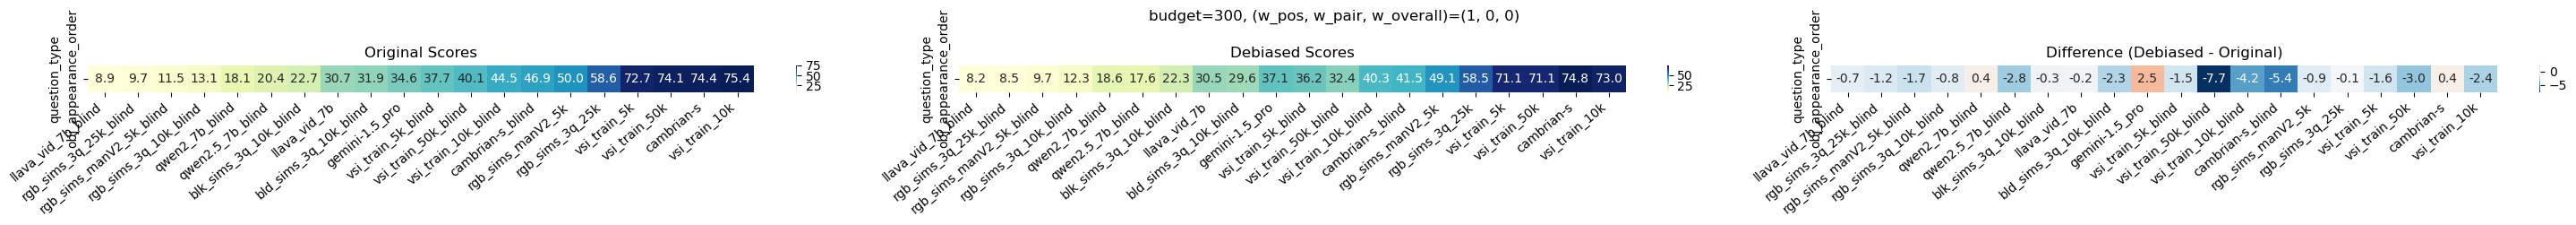

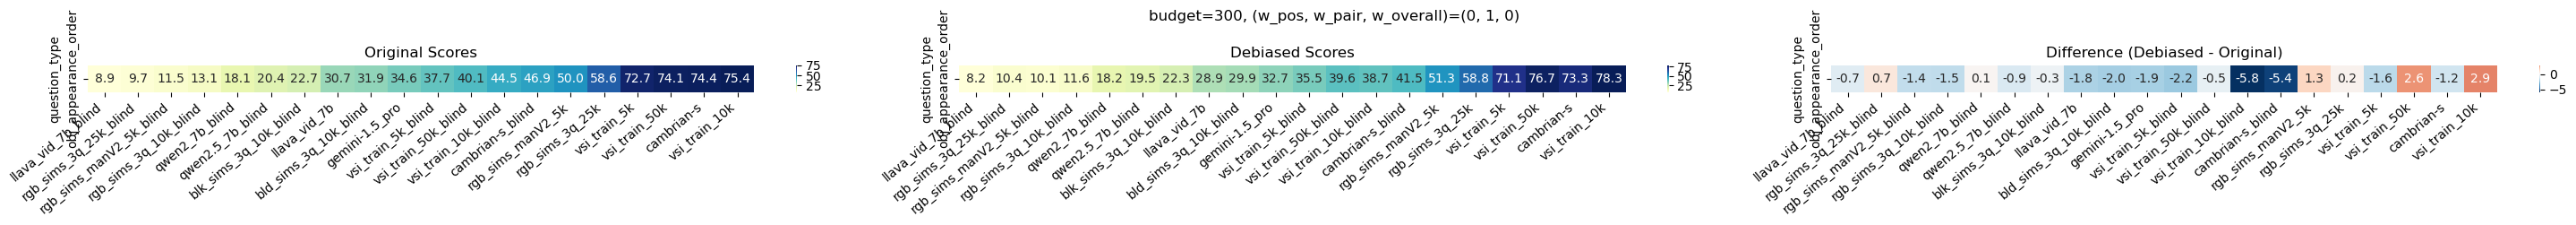

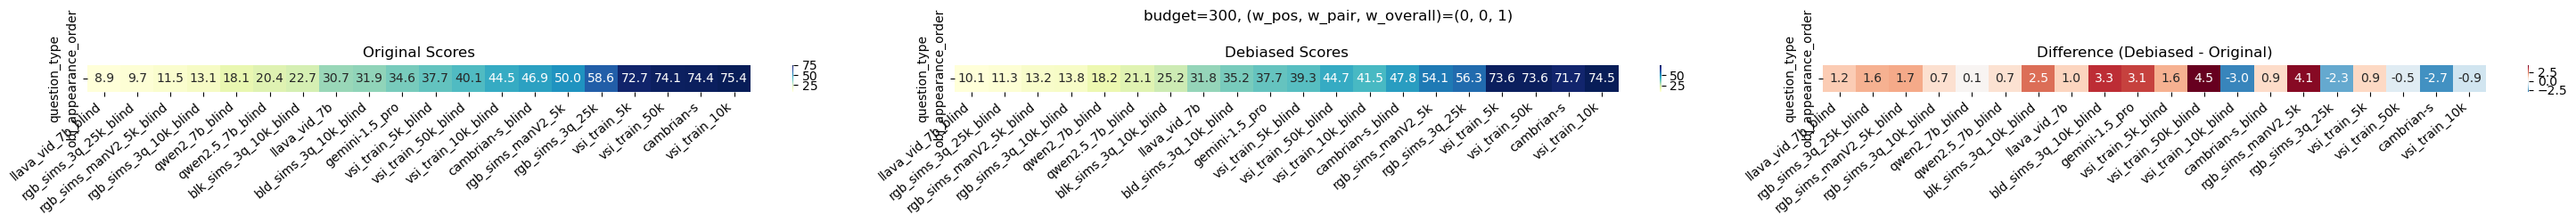

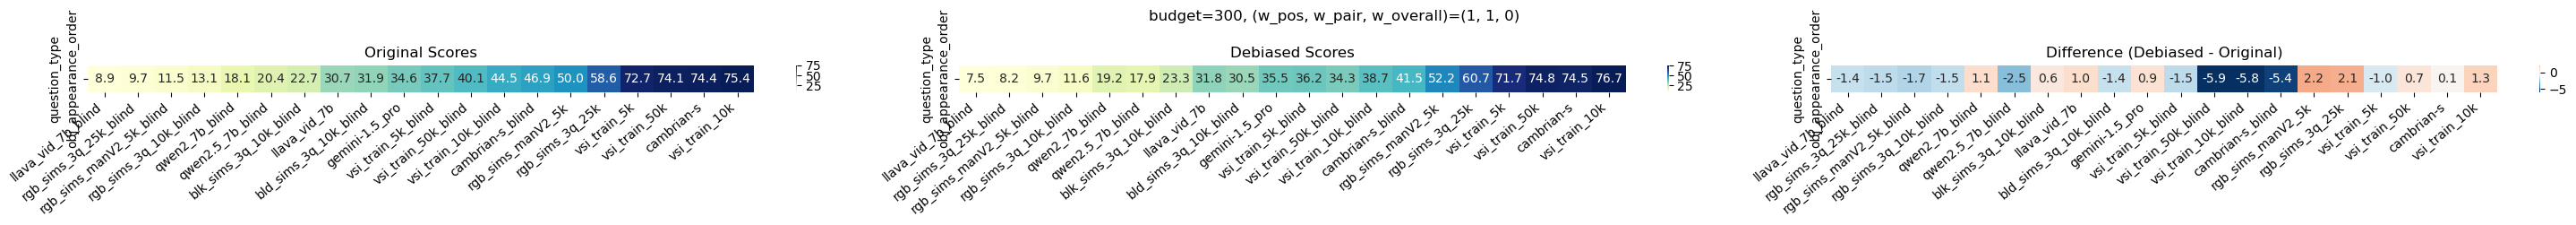

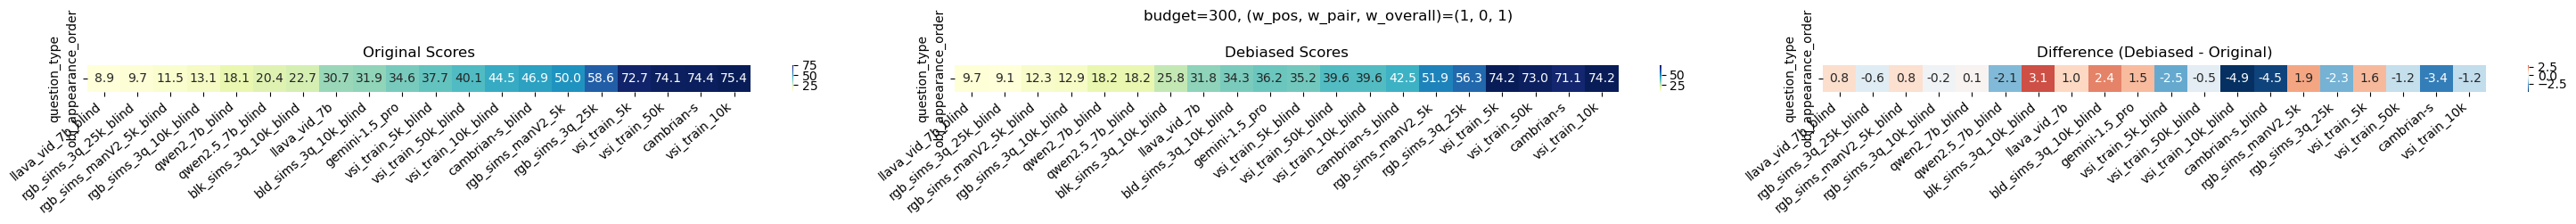

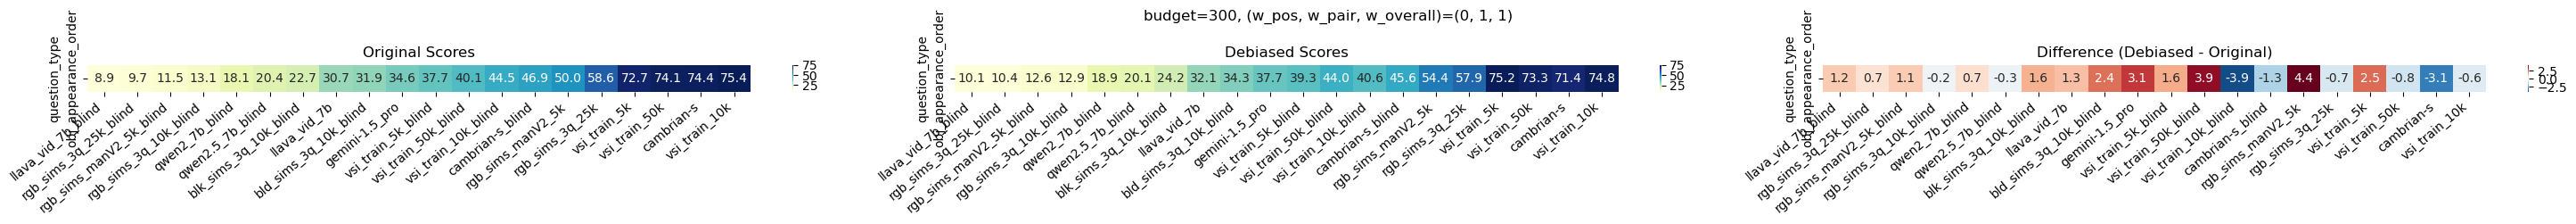

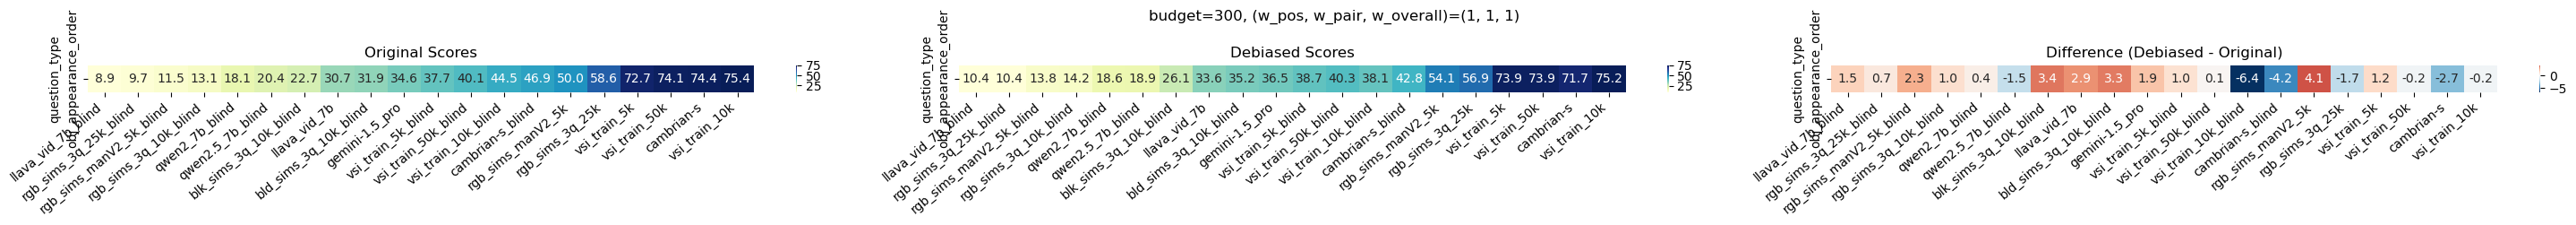

In [21]:
for w_pos, w_pair, w_overall in (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (1, 1, 0),
    (1, 0, 1),
    (0, 1, 1),
    (1, 1, 1),
    # (3, 1, 0),
    # (2, 1, 0),
    # (1, 1, 0),
    # (1, 2, 0),
    # (1, 3, 0),
):
    ids = dv.filter_app_order_relative(qdf, budget=budget, w_pos=w_pos, w_pair=w_pair, w_overall=w_overall)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, (w_pos, w_pair, w_overall)=({w_pos}, {w_pair}, {w_overall})");

Performing 5-Fold CV to get probabilities...
Cross-validation prediction complete.
Removed 300 samples from the dataset. Now 318 samples remain.


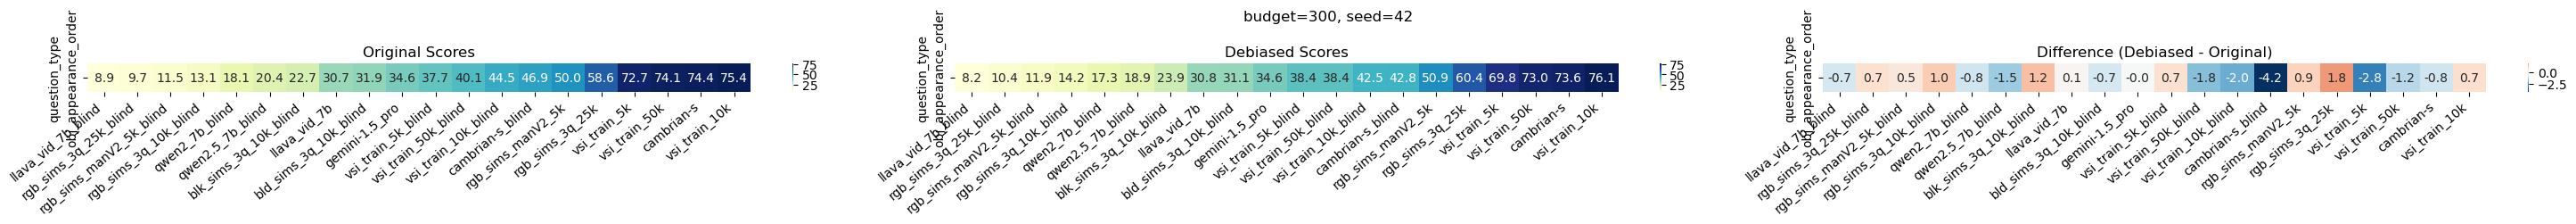

In [22]:
seed=42
ids = dv.filter_app_order_rf(qdf, budget=budget, seed=seed)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, seed={seed}");

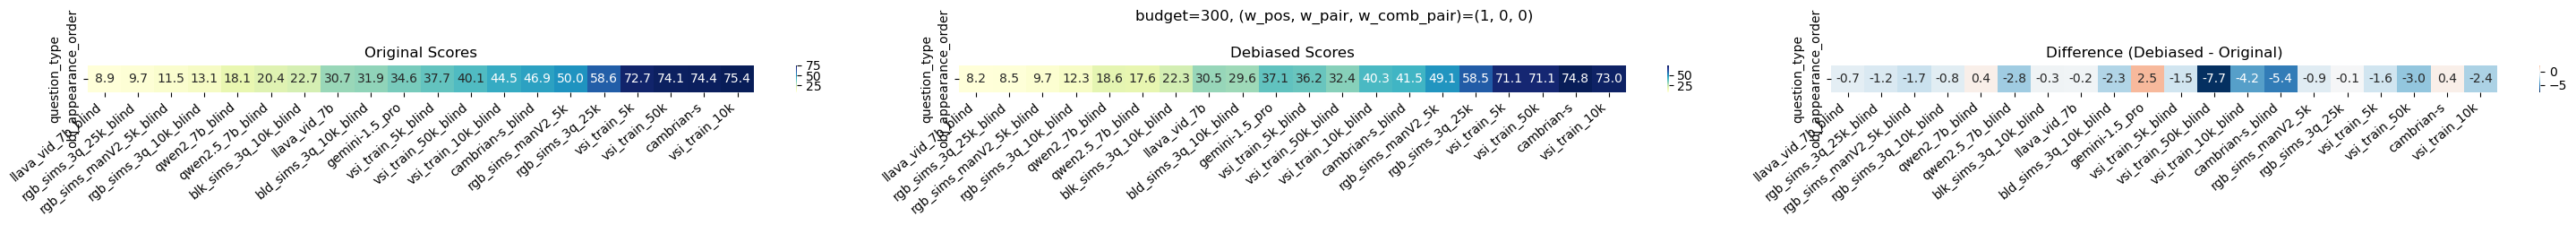

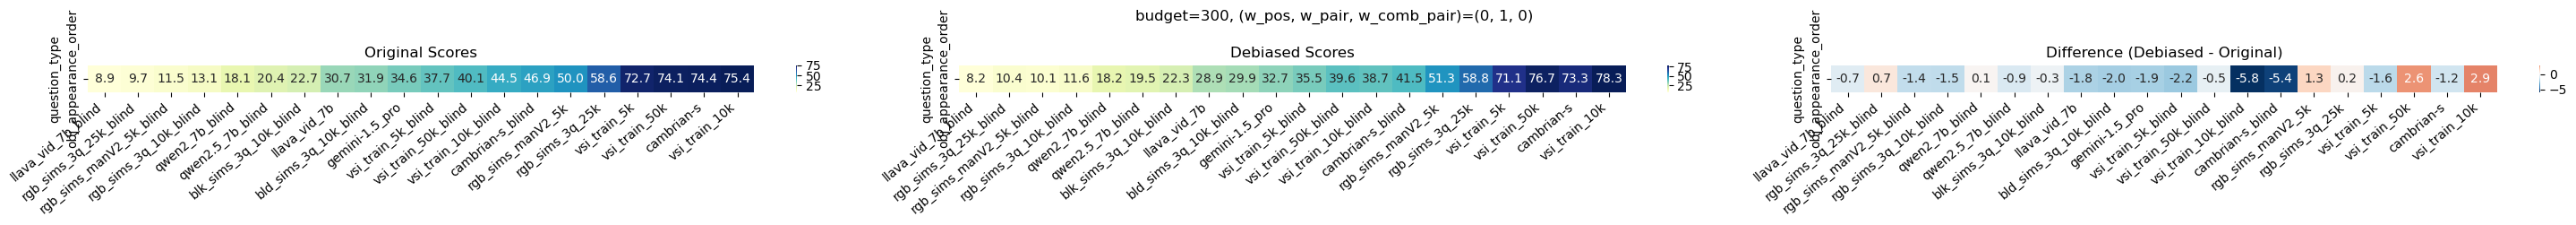

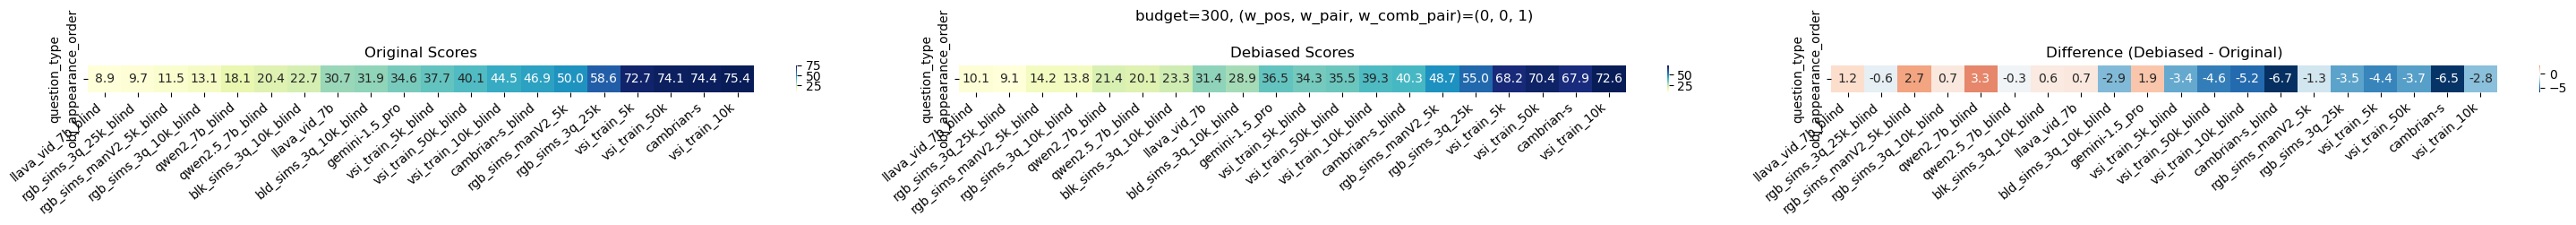

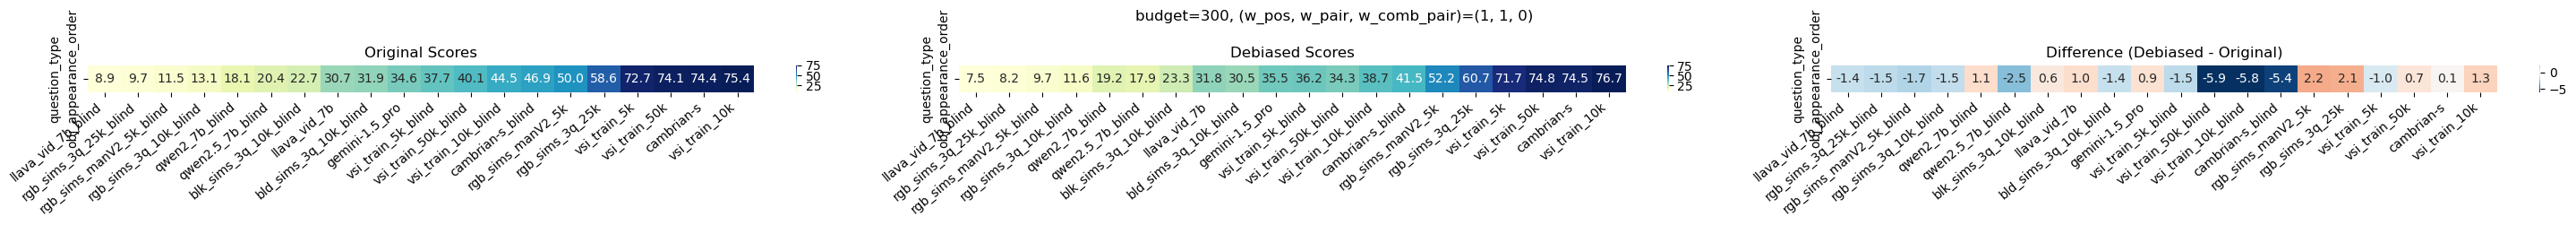

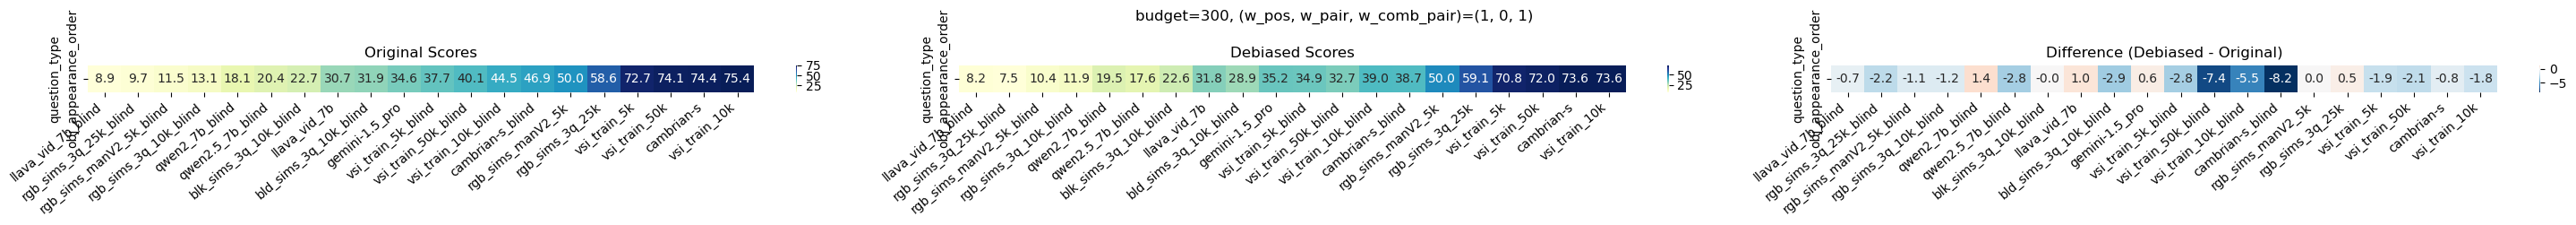

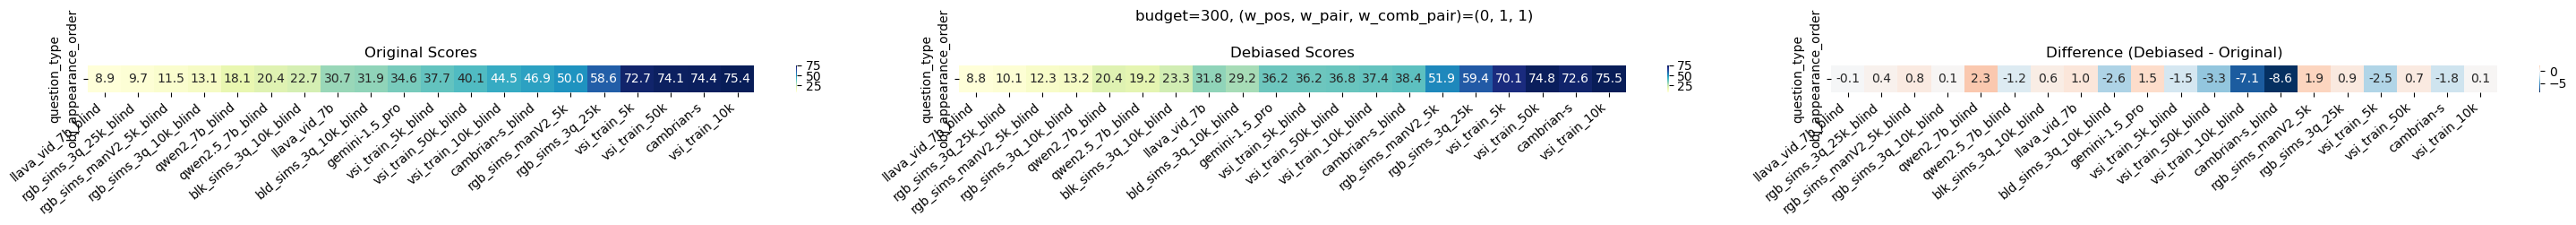

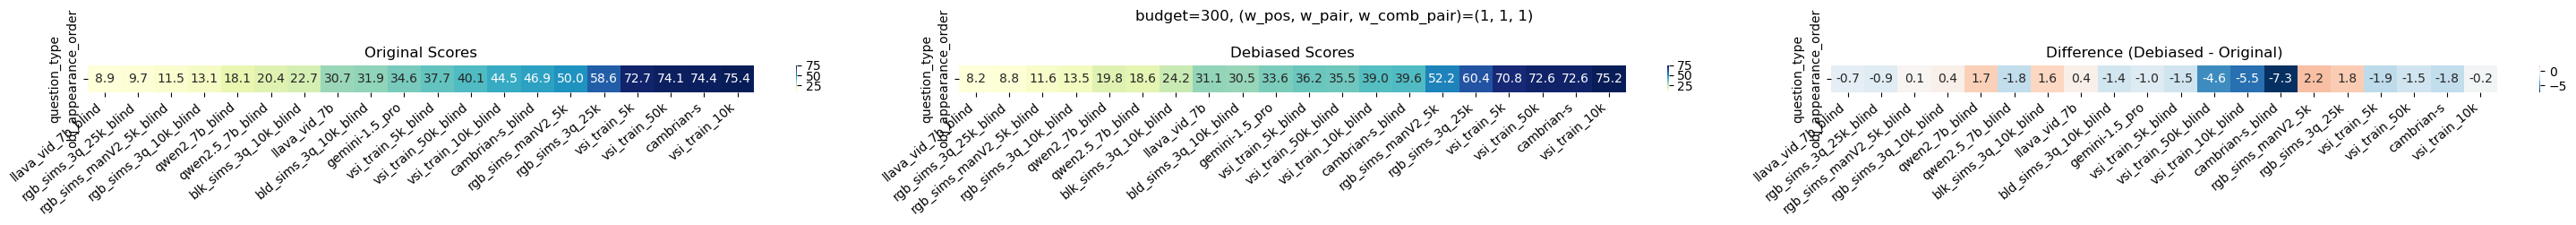

In [23]:
for w_pos, w_pair, w_comb_pair in (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (1, 1, 0),
    (1, 0, 1),
    (0, 1, 1),
    (1, 1, 1),
):
    ids = dv.filter_app_order_relative_v2(qdf, budget=budget, w_pos=w_pos, w_pair=w_pair, w_comb_pair=w_comb_pair)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, (w_pos, w_pair, w_comb_pair)=({w_pos}, {w_pair}, {w_comb_pair})");

In [24]:
models = dv.get_model_columns(qdf)
models

['bld_sims_3q_10k_blind',
 'blk_sims_3q_10k_blind',
 'cambrian-s',
 'cambrian-s_blind',
 'gemini-1.5_pro',
 'llava_vid_7b',
 'llava_vid_7b_blind',
 'qwen2.5_7b_blind',
 'qwen2_7b_blind',
 'rgb_sims_3q_10k_blind',
 'rgb_sims_3q_25k',
 'rgb_sims_3q_25k_blind',
 'rgb_sims_manV2_5k',
 'rgb_sims_manV2_5k_blind',
 'vsi_train_10k',
 'vsi_train_10k_blind',
 'vsi_train_50k',
 'vsi_train_50k_blind',
 'vsi_train_5k',
 'vsi_train_5k_blind']

In [25]:
# let's look at the rows that 'bld_sims_3q_10k_blind' gets right that 'rgb_sims_3q_10k_blind' also gets right and gets wrong

blind_nm = "bld_sims_3q_10k_blind"
rgb_nm = "rgb_sims_3q_10k_blind"
# blind_nm = "vsi_train_10k_blind"
# rgb_nm = "vsi_train_10k"

both_right = qdf.loc[
    (qdf[blind_nm] > 0) &
    (qdf[rgb_nm] > 0)
]
bld_right = qdf.loc[
    (qdf[blind_nm] > 0) &
    (qdf[rgb_nm] == 0)
]
rgb_right = qdf.loc[
    (qdf[blind_nm] == 0) &
    (qdf[rgb_nm] > 0)
]
print(f"both_right: {len(both_right)} / {len(qdf)}")
print(f"bld_right: {len(bld_right)} / {len(qdf)}")
print(f"rgb_right: {len(rgb_right)} / {len(qdf)}")

both_right: 67 / 618
bld_right: 130 / 618
rgb_right: 14 / 618


In [26]:
bld_right
# both_right.head()

id    dataset    scene_name         question_type  \
2705  2717  scannetpp    5942004064  obj_appearance_order   
2718  2730  scannetpp    5942004064  obj_appearance_order   
2722  2734  scannetpp    5942004064  obj_appearance_order   
2725  2737  scannetpp    5942004064  obj_appearance_order   
2739  2751  scannetpp    25f3b7a318  obj_appearance_order   
...    ...        ...           ...                   ...   
4207  4227    scannet  scene0231_00  obj_appearance_order   
4208  4228    scannet  scene0231_00  obj_appearance_order   
4211  4231    scannet  scene0231_00  obj_appearance_order   
4213  4233    scannet  scene0231_00  obj_appearance_order   
4216  4236    scannet  scene0231_00  obj_appearance_order   

                                               question ground_truth  \
2705  What will be the first-time appearance order o...            B   
2718  What will be the first-time appearance order o...            B   
2722  What will be the first-time appearance order o...            B   
2725  What will be the first-time appearance order o...            A   
2739  What will be the first-time appearance order o...            B   
...                                                 ...          ...   
4207  What will be the first-time appearance order o...            A   
4208  What will be the first-time appearance order o...            C   
4211  What will be the first-time appearance order o...            B   
4213  What will be the first-time appearance order o...            C   
4216  What will be the first-time appearance order o...            B   

                                                options  \
2705  [A. basket, door, pillow, ceiling light, B. do...   
2718  [A. toilet, table, blanket, basket, B. toilet,...   
2722  [A. plant, toilet, basket, pillow, B. toilet, ...   
2725  [A. toilet, basket, blanket, plant, B. plant, ...   
2739  [A. basket, pillow, door, laptop, B. pillow, d...   
...                                                 ...   
4207  [A. microwave, lamp, sofa, plant, B. lamp, mic...   
4208  [A. plant, pillow, microwave, lamp, B. plant, ...   
4211  [A. plant, lamp, counter, sofa, B. counter, la...   
4213  [A. refrigerator, pillow, window, plant, B. pl...   
4216  [A. pillow, refrigerator, plant, lamp, B. refr...   

      bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  ...  gt_idx  \
2705                    1.0                    1.0         1.0  ...       1   
2718                    1.0                    1.0         0.0  ...       1   
2722                    1.0                    1.0         1.0  ...       1   
2725                    1.0                    0.0         1.0  ...       0   
2739                    1.0                    0.0         1.0  ...       1   
...                     ...                    ...         ...  ...     ...   
4207                    1.0                    1.0         0.0  ...       0   
4208                    1.0                    0.0         0.0  ...       2   
4211                    1.0                    0.0         1.0  ...       1   
4213                    1.0                    0.0         1.0  ...       2   
4216                    1.0                    1.0         1.0  ...       1   

                                gt_option      gt_obj_1  \
2705  door, basket, pillow, ceiling light          door   
2718       toilet, basket, blanket, table        toilet   
2722        toilet, basket, pillow, plant        toilet   
2725       toilet, basket, blanket, plant        toilet   
2739         pillow, door, laptop, basket        pillow   
...                                   ...           ...   
4207         microwave, lamp, sofa, plant     microwave   
4208       microwave, lamp, pillow, plant     microwave   
4211           counter, lamp, sofa, plant       counter   
4213  refrigerator, window, pillow, plant  refrigerator   
4216    refrigerator, lamp, pillow, plant  refrigerator   

                                  opt_seq_1

In [27]:
qdf["removed"] = qdf["id"].isin(removed_qdf["id"])
qdf["removed"].value_counts()

removed
False    318
True     300
Name: count, dtype: int64

In [28]:
deb_qdf["ground_truth"].value_counts()

ground_truth
D    87
C    83
A    74
B    74
Name: count, dtype: int64

In [29]:
a = dv.evaluate_models(qdf.loc[qdf["id"].isin(ids)])
b = dv.evaluate_models(qdf.loc[~qdf["id"].isin(ids)])
c = dv.evaluate_models(qdf)
d = b - c
# concat the dfs
pd.concat([a, b, c, d], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original", 3: "Difference"}).T.sort_values("Difference")

Removed   Debiased   Original  Difference
cambrian-s_blind         54.666667  39.622642  46.925566   -7.302925
vsi_train_10k_blind      50.333333  38.993711  44.498382   -5.504671
vsi_train_50k_blind      45.000000  35.534591  40.129450   -4.594859
vsi_train_5k             74.666667  70.754717  72.653722   -1.899005
qwen2.5_7b_blind         22.333333  18.553459  20.388350   -1.834890
cambrian-s               76.333333  72.641509  74.433657   -1.792148
vsi_train_5k_blind       39.333333  36.163522  37.702265   -1.538743
vsi_train_50k            75.666667  72.641509  74.110032   -1.468523
bld_sims_3q_10k_blind    33.333333  30.503145  31.877023   -1.373878
gemini-1.5_pro           35.666667  33.647799  34.627832   -0.980033
rgb_sims_3q_25k_blind    10.666667   8.805031   9.708738   -0.903706
llava_vid_7b_blind        9.666667   8.176101   8.899676   -0.723576
vsi_train_10k            75.666667  75.157233  75.404531   -0.247298
rgb_sims_manV2_5k_blind  11.333333  11.635220  11.488673    0.146547
llava_vid_7b             30.333333  31.132075  30.744337    0.387739
rgb_sims_3q_10k_blind    12.666667  13.522013  13.106796    0.415216
blk_sims_3q_10k_blind    21.000000  24.213836  22.653722    1.560115
qwen2_7b_blind           16.333333  19.811321  18.122977    1.688343
rgb_sims_3q_25k          56.666667  60.377358  58.576052    1.801307
rgb_sims_manV2_5k        47.666667  52.201258  50.000000    2.201258

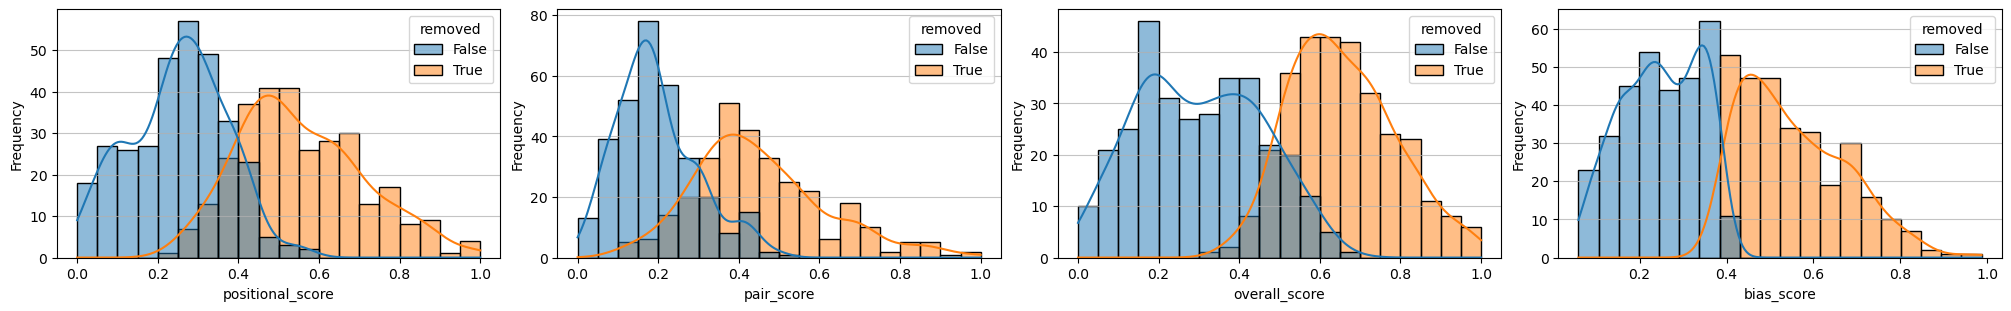

In [30]:
budget = 300
w_pos = 1.0
w_pair = 1.0
w_overall = 1.0

min_samples_per_pair = 0

df_filtered = dv.get_app_order_scored_v4(qdf, w_pos, w_pair, w_overall)

df_sorted = df_filtered.sort_values('bias_score', ascending=False)
remove_ids = df_sorted['id'].head(budget).tolist()

df_sorted["removed"] = df_sorted["id"].isin(remove_ids)
filtered_df = df_sorted[~df_sorted['id'].isin(remove_ids)]
removed_df = df_sorted[df_sorted['id'].isin(remove_ids)]
removed_df.sort_values("bias_score", ascending=False)

# Visualize the distribution of scores in subplots

# scores = ["obj_freq_score", "val_freq_score", "combo_freq_score", "bias_score"]
# scores = ["pair_freq_score", "inv_var_score", "close_score_log", "global_typicality_score", "bias_score"]
scores = ['positional_score', 'pair_score', 'overall_score', 'bias_score']

fig, axes = plt.subplots(1, len(scores), figsize=(20, 3), constrained_layout=True)

# plot_df = df_sorted[df_sorted["object_pair"].map(kept_counts) >= min_samples_per_pair]
plot_df = df_sorted

for i, score in enumerate(scores):
    sns.histplot(data=plot_df, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()

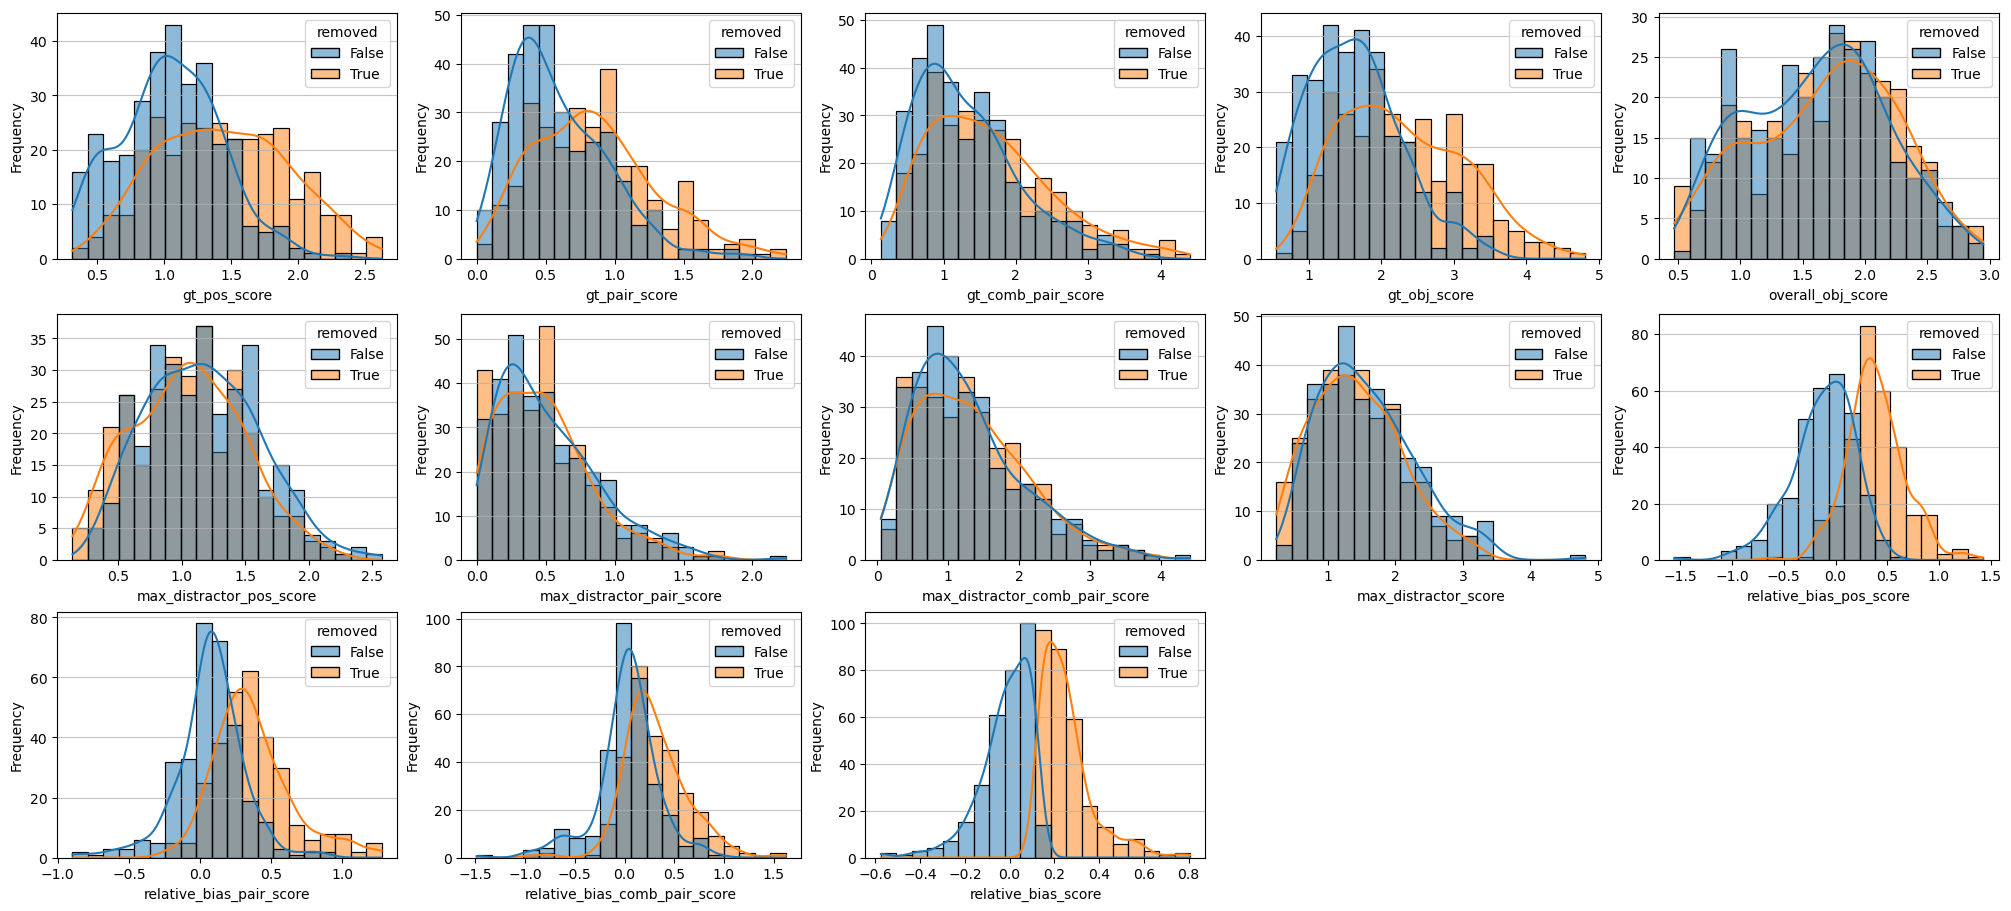

In [31]:
budget = 300
w_pos = 1.0
w_pair = 1.0
# w_overall = 1.0
w_overall = 0.0

min_samples_per_pair = 0

df_filtered = dv.get_app_order_relative_score(qdf, w_pos, w_pair, w_overall)
remove_ids = dv.filter_app_order_relative(qdf, budget, w_pos, w_pair, w_overall)
# df_filtered = dv.get_app_order_rf_score(qdf)
# remove_ids = dv.filter_app_order_rf(qdf, budget)
df_sorted = df_filtered.sort_values('relative_bias_score', ascending=False)
df_sorted["removed"] = df_sorted["id"].isin(remove_ids)

filtered_df = df_sorted[~df_sorted['id'].isin(remove_ids)]
removed_df = df_sorted[df_sorted['id'].isin(remove_ids)]
removed_df.sort_values("relative_bias_score", ascending=False)

# Visualize the distribution of scores in subplots

# scores = ["obj_freq_score", "val_freq_score", "combo_freq_score", "bias_score"]
# scores = ["pair_freq_score", "inv_var_score", "close_score_log", "global_typicality_score", "bias_score"]
scores = [
    'gt_pos_score',
    'gt_pair_score',
    'gt_comb_pair_score',
    'gt_obj_score',
    # 'gt_overall_score',
    'overall_obj_score',
    'max_distractor_pos_score',
    'max_distractor_pair_score',
    'max_distractor_comb_pair_score',
    # 'max_distractor_overall_score',
    'max_distractor_score',
    'relative_bias_pos_score',
    'relative_bias_pair_score',
    'relative_bias_comb_pair_score',
    # 'relative_bias_overall_score',
    'relative_bias_score',
]

# Determine the number of rows needed
num_rows = (len(scores) + 4) // 5  # 5 scores per row

fig, axes = plt.subplots(num_rows, min(len(scores), 5), figsize=(20, 3 * num_rows), constrained_layout=True)

# Flatten axes if there are multiple rows
axes = axes.flatten() if num_rows > 1 else [axes]

plot_df = df_sorted

for i, score in enumerate(scores):
    sns.histplot(data=plot_df, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

Performing 5-Fold CV to get probabilities...
Cross-validation prediction complete.
Performing 5-Fold CV to get probabilities...
Cross-validation prediction complete.


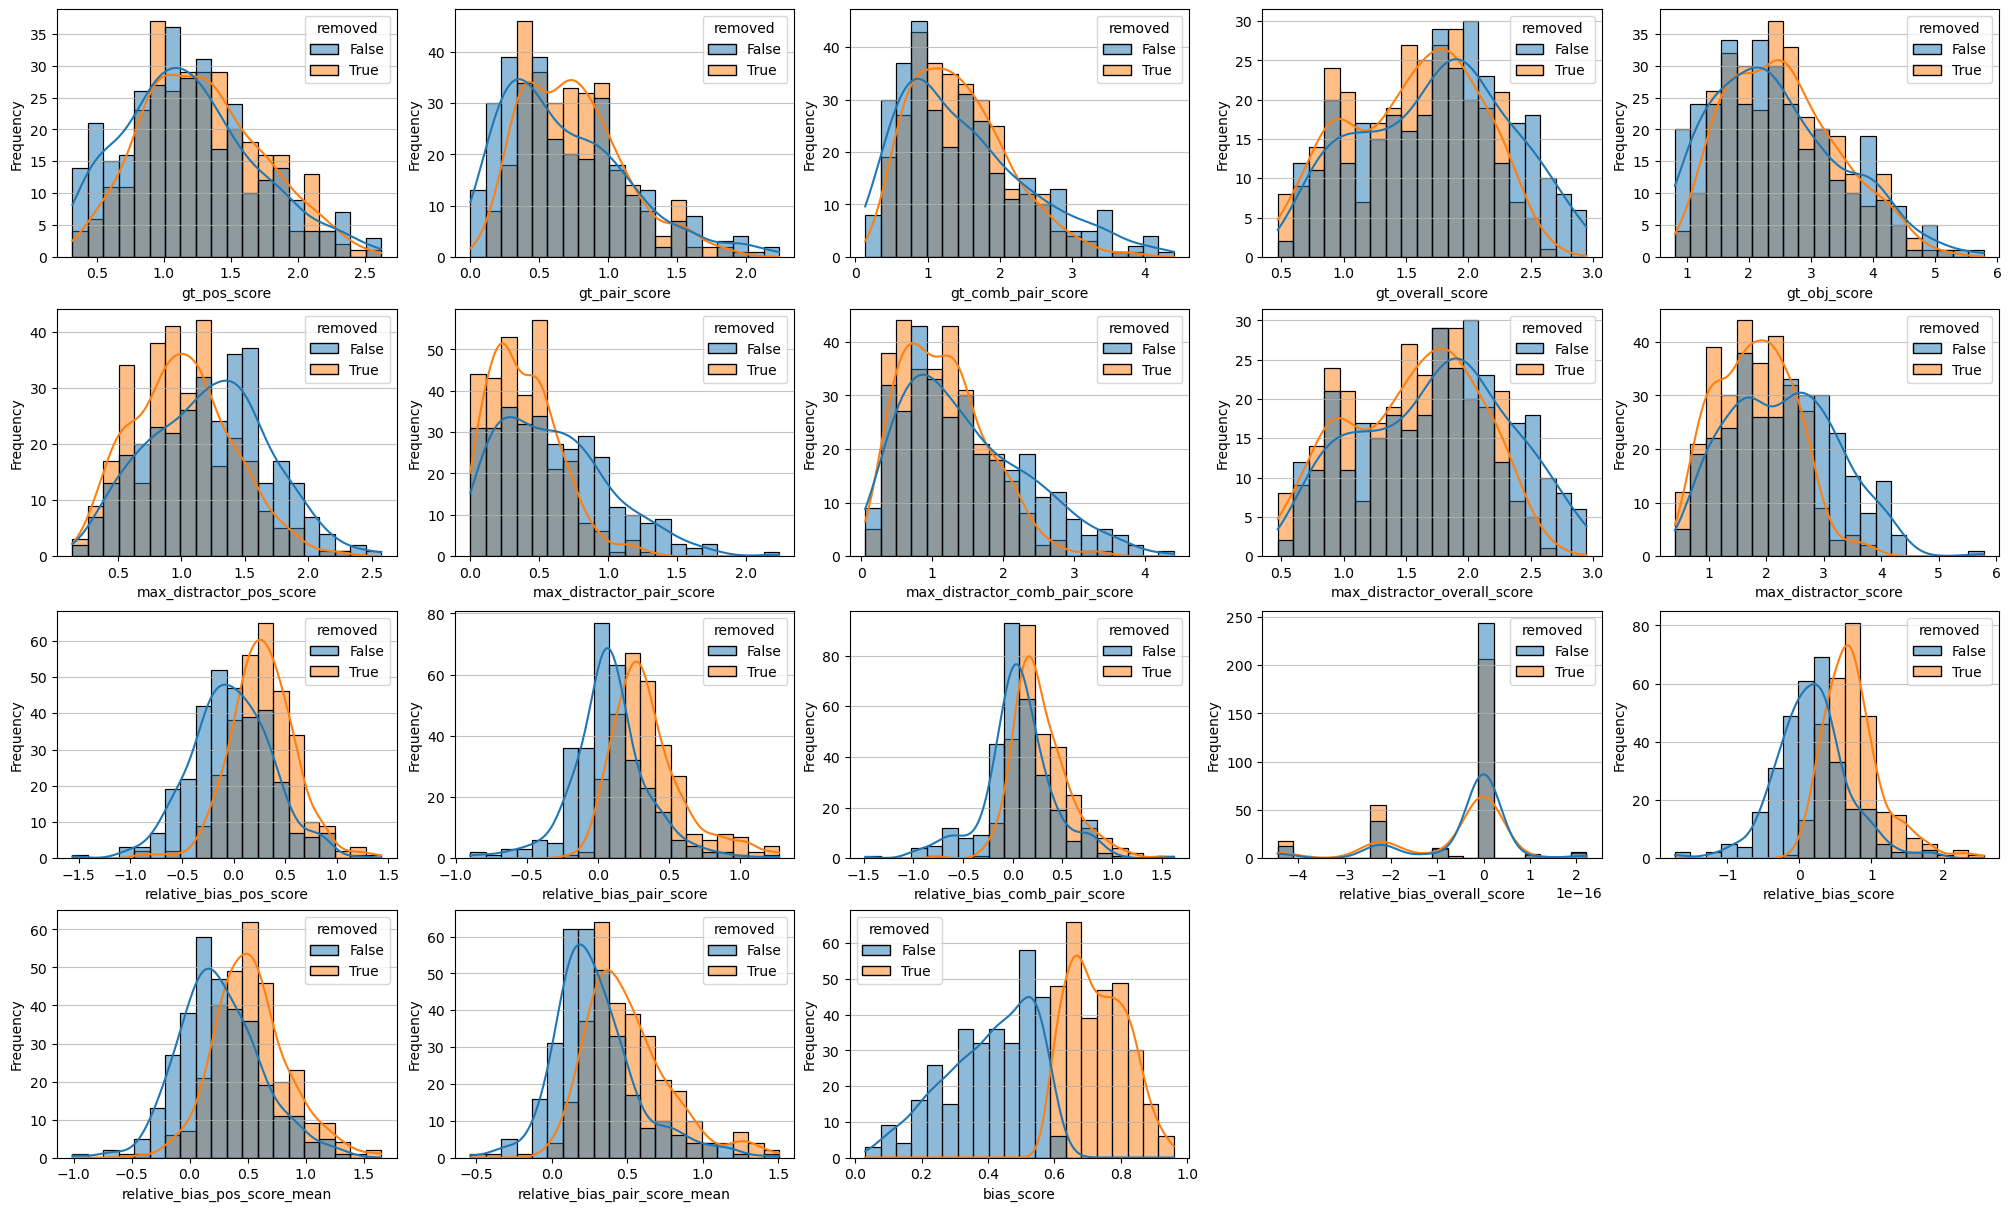

In [32]:
budget = 300
w_pos = 1.0
w_pair = 1.0
w_overall = 1.0

min_samples_per_pair = 0

# df_filtered = dv.get_app_order_relative_score(qdf, w_pos, w_pair, w_overall)
# remove_ids = dv.filter_app_order_relative(qdf, budget, w_pos, w_pair, w_overall)
df_filtered = dv.get_app_order_rf_score(qdf)
remove_ids = dv.filter_app_order_rf(qdf, budget)
df_sorted = df_filtered.sort_values('relative_bias_score', ascending=False)
df_sorted["removed"] = df_sorted["id"].isin(remove_ids)

filtered_df = df_sorted[~df_sorted['id'].isin(remove_ids)]
removed_df = df_sorted[df_sorted['id'].isin(remove_ids)]
removed_df.sort_values("relative_bias_score", ascending=False)

# Visualize the distribution of scores in subplots

# scores = ["obj_freq_score", "val_freq_score", "combo_freq_score", "bias_score"]
# scores = ["pair_freq_score", "inv_var_score", "close_score_log", "global_typicality_score", "bias_score"]
scores = [
    'gt_pos_score',
    'gt_pair_score',
    'gt_comb_pair_score',
    'gt_overall_score',
    'gt_obj_score',
    'max_distractor_pos_score',
    'max_distractor_pair_score',
    'max_distractor_comb_pair_score',
    'max_distractor_overall_score',
    'max_distractor_score',
    'relative_bias_pos_score',
    'relative_bias_pair_score',
    'relative_bias_comb_pair_score',
    'relative_bias_overall_score',
    'relative_bias_score',
    'relative_bias_pos_score_mean',
    'relative_bias_pair_score_mean',
    'bias_score',
]

# Determine the number of rows needed
num_rows = (len(scores) + 4) // 5  # 5 scores per row

fig, axes = plt.subplots(num_rows, min(len(scores), 5), figsize=(20, 3 * num_rows), constrained_layout=True)

# Flatten axes if there are multiple rows
axes = axes.flatten() if num_rows > 1 else [axes]

plot_df = df_sorted

for i, score in enumerate(scores):
    sns.histplot(data=plot_df, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

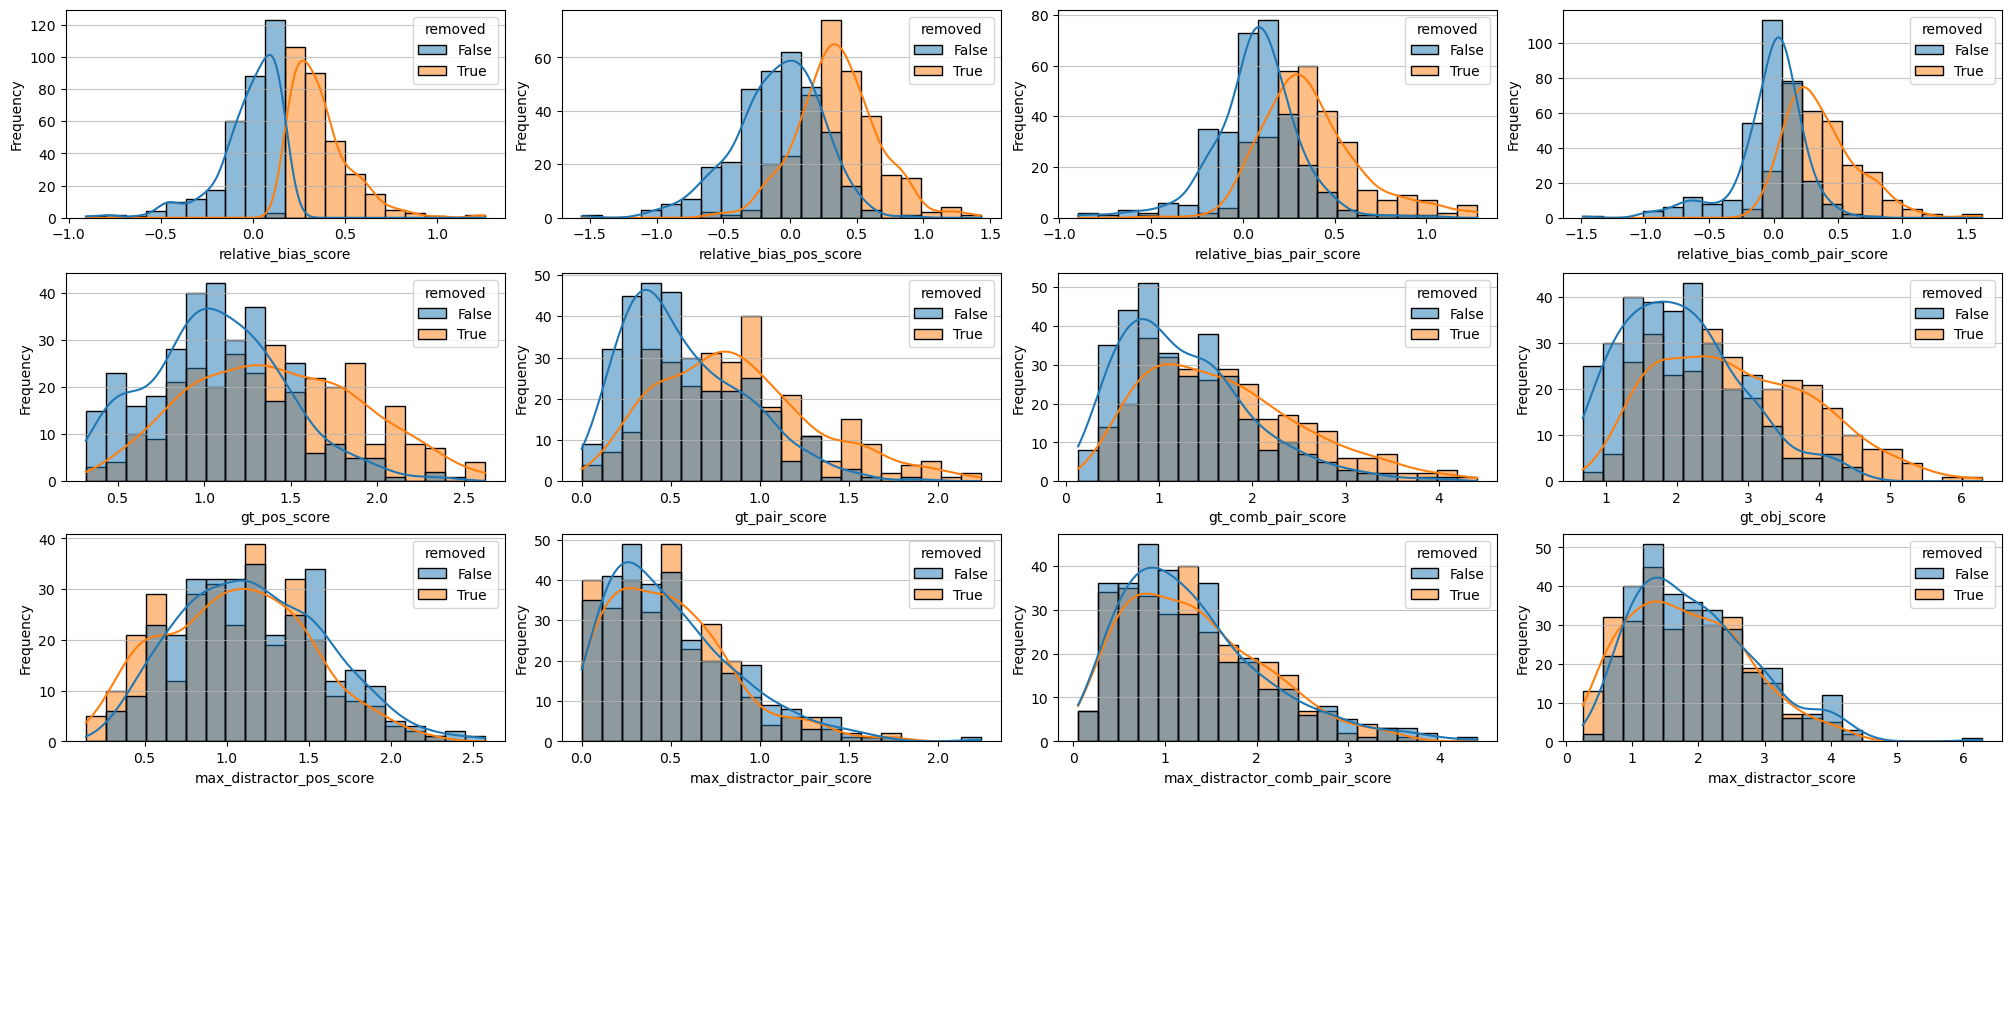

In [33]:
budget = 300
w_pos = 1.0
w_pair = 1.0
w_comb_pair = 1.0

min_samples_per_pair = 0

df_filtered = dv.get_app_order_relative_score_v2(qdf, w_pos, w_pair, w_comb_pair)
remove_ids = dv.filter_app_order_relative_v2(qdf, budget, w_pos, w_pair, w_comb_pair)

df_sorted = df_filtered.sort_values('relative_bias_score', ascending=False)
df_sorted["removed"] = df_sorted["id"].isin(remove_ids)

filtered_df = df_sorted[~df_sorted['id'].isin(remove_ids)]
removed_df = df_sorted[df_sorted['id'].isin(remove_ids)]
removed_df.sort_values("relative_bias_score", ascending=False)

# Visualize the distribution of scores in subplots

# scores = ["obj_freq_score", "val_freq_score", "combo_freq_score", "bias_score"]
# scores = ["pair_freq_score", "inv_var_score", "close_score_log", "global_typicality_score", "bias_score"]
scores = [
    'relative_bias_score',
    'relative_bias_pos_score',
    'relative_bias_pair_score',
    'relative_bias_comb_pair_score',
    'gt_pos_score',
    'gt_pair_score',
    'gt_comb_pair_score',
    'gt_obj_score',
    'max_distractor_pos_score',
    'max_distractor_pair_score',
    'max_distractor_comb_pair_score',
    'max_distractor_score',
]

# Determine the number of rows needed
num_rows = (len(scores) + 4) // 4  # 4 scores per row

fig, axes = plt.subplots(num_rows, min(len(scores), 4), figsize=(20, 2.5 * num_rows), constrained_layout=True)

# Flatten axes if there are multiple rows
axes = axes.flatten() if num_rows > 1 else [axes]

plot_df = df_sorted

for i, score in enumerate(scores):
    sns.histplot(data=plot_df, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

In [34]:
df_sorted.iloc[0].to_dict()

{'id': 3986,
 'dataset': 'scannet',
 'scene_name': 'scene0653_00',
 'question_type': 'obj_appearance_order',
 'question': 'What will be the first-time appearance order of the following categories in the video: monitor, window, clock, door?',
 'ground_truth': 'A',
 'options': array(['A. monitor, door, window, clock',
        'B. window, monitor, clock, door',
        'C. monitor, window, clock, door',
        'D. window, door, clock, monitor'], dtype=object),
 'bld_sims_3q_10k_blind': 0.0,
 'blk_sims_3q_10k_blind': 0.0,
 'cambrian-s': 1.0,
 'cambrian-s_blind': 1.0,
 'gemini-1.5_pro': 0.0,
 'llava_vid_7b': 0.0,
 'llava_vid_7b_blind': 0.0,
 'qwen2.5_7b_blind': 0.0,
 'qwen2_7b_blind': 0.0,
 'rgb_sims_3q_10k_blind': 0.0,
 'rgb_sims_3q_25k': 1.0,
 'rgb_sims_3q_25k_blind': 0.0,
 'rgb_sims_manV2_5k': 0.0,
 'rgb_sims_manV2_5k_blind': 0.0,
 'vsi_train_10k': 1.0,
 'vsi_train_10k_blind': 1.0,
 'vsi_train_50k': 1.0,
 'vsi_train_50k_blind': 0.0,
 'vsi_train_5k': 1.0,
 'vsi_train_5k_blind': 1.0,
 'gt

In [35]:
df_sorted.columns

Index(['id', 'dataset', 'scene_name', 'question_type', 'question',
       'ground_truth', 'options', 'bld_sims_3q_10k_blind',
       'blk_sims_3q_10k_blind', 'cambrian-s', 'cambrian-s_blind',
       'gemini-1.5_pro', 'llava_vid_7b', 'llava_vid_7b_blind',
       'qwen2.5_7b_blind', 'qwen2_7b_blind', 'rgb_sims_3q_10k_blind',
       'rgb_sims_3q_25k', 'rgb_sims_3q_25k_blind', 'rgb_sims_manV2_5k',
       'rgb_sims_manV2_5k_blind', 'vsi_train_10k', 'vsi_train_10k_blind',
       'vsi_train_50k', 'vsi_train_50k_blind', 'vsi_train_5k',
       'vsi_train_5k_blind', 'gt_idx', 'gt_option', 'gt_obj_1', 'opt_seq_1',
       'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4',
       'opt_seq_4', 'removed', 'seq_0_pos_score', 'seq_0_pair_score',
       'seq_0_comb_pair_score', 'seq_0_score', 'gt_pos_score', 'gt_pair_score',
       'gt_comb_pair_score', 'gt_obj_score', 'seq_1_pos_score',
       'seq_1_pair_score', 'seq_1_comb_pair_score', 'seq_1_score',
       'seq_2_pos_score', 'seq_2_pair_s

In [36]:
import numpy as np # Added for mean/std calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer # Added make_scorer for cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score # Added KFold and cross_val_score
from sklearn.preprocessing import LabelEncoder

def evaluate_rf_bias_cv(scored_df: pd.DataFrame, n_splits: int = 5) -> tuple[float, float, pd.DataFrame]:
    """
    Trains and evaluates a RandomForestClassifier using k-fold cross-validation
    on non-visual features of object_rel_distance questions to predict the
    ground truth answer ('A'/'B'/'C'/'D').

    Args:
        scored_df: DataFrame containing features and the 'ground_truth' target column.
                   Expected features: 'object_1', 'object_2', 'object_3', 'object_4',
                                      'target_object', 'gt_obj_prob', 'pair_prob',
                                      'ord_pair_prob'.
        n_splits: Number of folds for StratifiedKFold cross-validation.

    Returns:
        A tuple containing:
        - mean_accuracy (float): Mean accuracy across the cross-validation folds.
        - std_accuracy (float): Standard deviation of accuracy across the folds.
        - feature_importance_df (pd.DataFrame | None): DataFrame with feature importances
          from a model trained on the full dataset, or None if calculation fails.
    """
    print(f"--- Starting RF Bias Evaluation (CV with {n_splits} splits) ---")

    # --- 1. Select Features and Target ---
    # feature_cols = [
    #     'object_1', 'object_2', 'object_3', 'object_4', 'target_object',
    #     'gt_obj_prob', 'pair_prob', 'ord_pair_prob'
        # 'gt_obj_1', 'gt_obj_2', 'gt_obj_3', 'gt_obj_4',
        # 'positional_score', 'pair_score', 'overall_score',
    # ]
    feature_cols = [
        # 'gt_option', 'gt_obj_1', 'opt_seq_1',
        # 'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4',
        # 'opt_seq_4', 'seq_0_pos_score', 'seq_0_pair_score',
        # 'seq_0_overall_score', 'seq_0_score', 'gt_pos_score', 'gt_pair_score',
        # 'gt_overall_score', 'gt_obj_score', 'seq_1_pos_score',
        # 'seq_1_pair_score', 'seq_1_overall_score', 'seq_1_score',
        # 'seq_2_pos_score', 'seq_2_pair_score', 'seq_2_overall_score',
        # 'seq_2_score', 'seq_3_pos_score', 'seq_3_pair_score',
        # 'seq_3_overall_score', 'seq_3_score', 'max_distractor_pos_score',
        # 'max_distractor_pair_score', 'max_distractor_overall_score',
        # 'max_distractor_score', 'relative_bias_pos_score',
        # 'relative_bias_pair_score', 'relative_bias_overall_score',
        # 'relative_bias_score',

        # 'gt_option', 'gt_obj_1', 'opt_seq_1',
        # 'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4',
        # 'opt_seq_4', 'seq_0_pos_score', 'seq_0_pair_score',
        # 'seq_0_overall_score', 'seq_0_comb_pair_score', 'seq_0_score',
        # 'gt_pos_score', 'gt_pair_score', 'gt_overall_score',
        # 'gt_comb_pair_score', 'gt_obj_score', 'seq_1_pos_score',
        # 'seq_1_pair_score', 'seq_1_overall_score', 'seq_1_comb_pair_score',
        # 'seq_1_score', 'seq_2_pos_score', 'seq_2_pair_score',
        # 'seq_2_overall_score', 'seq_2_comb_pair_score', 'seq_2_score',
        # 'seq_3_pos_score', 'seq_3_pair_score', 'seq_3_overall_score',
        # 'seq_3_comb_pair_score', 'seq_3_score', 'max_distractor_pos_score',
        # 'max_distractor_pair_score', 'max_distractor_overall_score',
        # 'max_distractor_comb_pair_score', 'max_distractor_score',
        # 'relative_bias_pos_score', 'relative_bias_pair_score',
        # 'relative_bias_overall_score', 'relative_bias_comb_pair_score',
        # 'relative_bias_score',

        # 'gt_option', 'gt_obj_1', 'opt_seq_1',
        # 'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4',
        # 'opt_seq_4', 'seq_0_pos_score', 'seq_0_pair_score',
        # 'seq_0_overall_score', 'seq_0_comb_pair_score', 'seq_0_score',
        # 'gt_pos_score', 'gt_pair_score', 'gt_overall_score',
        # 'gt_comb_pair_score', 'gt_obj_score', 'seq_1_pos_score',
        # 'seq_1_pair_score', 'seq_1_overall_score', 'seq_1_comb_pair_score',
        # 'seq_1_score', 'seq_2_pos_score', 'seq_2_pair_score',
        # 'seq_2_overall_score', 'seq_2_comb_pair_score', 'seq_2_score',
        # 'seq_3_pos_score', 'seq_3_pair_score', 'seq_3_overall_score',
        # 'seq_3_comb_pair_score', 'seq_3_score', 'max_distractor_pos_score',
        # 'max_distractor_pair_score', 'max_distractor_overall_score',
        # 'max_distractor_comb_pair_score', 'max_distractor_score',
        # 'relative_bias_pos_score', 'relative_bias_pair_score',
        # 'relative_bias_overall_score', 'relative_bias_comb_pair_score',
        # 'relative_bias_score', 'bias_score',

        # "seq_0_score", "seq_1_score", "seq_2_score", "seq_3_score",
        # "seq_0_pair_score", "seq_1_pair_score", "seq_2_pair_score", "seq_3_pair_score",
        # "seq_0_comb_pair_score", "seq_1_comb_pair_score", "seq_2_comb_pair_score", "seq_3_comb_pair_score",

        # 'gt_option', 'gt_obj_1', 'opt_seq_1',
        # 'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4',
        # 'opt_seq_4', 'seq_0_pos_score', 'seq_0_pair_score',
        # 'seq_0_overall_score', 'seq_0_comb_pair_score', 'seq_0_score',
        # 'gt_pos_score', 'gt_pair_score', 'gt_overall_score',
        # 'gt_comb_pair_score', 'gt_obj_score', 'seq_1_pos_score',
        # 'seq_1_pair_score', 'seq_1_overall_score', 'seq_1_comb_pair_score',
        # 'seq_1_score', 'seq_2_pos_score', 'seq_2_pair_score',
        # 'seq_2_overall_score', 'seq_2_comb_pair_score', 'seq_2_score',
        # 'seq_3_pos_score', 'seq_3_pair_score', 'seq_3_overall_score',
        # 'seq_3_comb_pair_score', 'seq_3_score', 'max_distractor_pos_score',
        # 'max_distractor_pair_score', 'max_distractor_overall_score',
        # 'max_distractor_comb_pair_score', 'max_distractor_score',
        # 'mean_distractor_pos_score', 'mean_distractor_pair_score',
        # 'mean_distractor_overall_score', 'mean_distractor_comb_pair_score',
        # 'mean_distractor_score', 'relative_bias_pos_score',
        # 'relative_bias_pair_score', 'relative_bias_overall_score',
        # 'relative_bias_comb_pair_score', 'relative_bias_score',
        # 'relative_bias_pos_score_mean', 'relative_bias_pair_score_mean',
        # 'relative_bias_overall_score_mean',
        # 'relative_bias_comb_pair_score_mean', 'relative_bias_score_mean',
        # 'bias_score',

        'gt_option', 'gt_obj_1', 'opt_seq_1',
        'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4',
        'opt_seq_4', 'seq_0_pos_score', 'seq_0_pair_score',
        'seq_0_comb_pair_score', 'seq_0_score', 'gt_pos_score', 'gt_pair_score',
        'gt_comb_pair_score', 'gt_obj_score', 'seq_1_pos_score',
        'seq_1_pair_score', 'seq_1_comb_pair_score', 'seq_1_score',
        'seq_2_pos_score', 'seq_2_pair_score', 'seq_2_comb_pair_score',
        'seq_2_score', 'seq_3_pos_score', 'seq_3_pair_score',
        'seq_3_comb_pair_score', 'seq_3_score', 'max_distractor_pos_score',
        'max_distractor_pair_score', 'max_distractor_comb_pair_score',
        'max_distractor_score', 'relative_bias_pos_score',
        'relative_bias_pair_score', 'relative_bias_comb_pair_score',
        'relative_bias_score',

    ]
    # target_col = 'ground_truth'
    target_col = 'ground_truth'

    # Check for essential columns
    required_cols = feature_cols + [target_col]
    missing_cols = [col for col in required_cols if col not in scored_df.columns]
    if missing_cols:
        print(f"Error: Input DataFrame is missing required columns: {missing_cols}")
        raise ValueError(f"Missing required columns: {missing_cols}")

    # Create a working copy and drop rows with missing values in relevant columns
    data = scored_df[required_cols].copy()
    initial_rows = len(data)
    data.dropna(inplace=True)
    final_rows = len(data)
    if final_rows < initial_rows:
        print(f"Warning: Dropped {initial_rows - final_rows} rows due to missing values in features or target.")

    if data.empty:
        print("Error: DataFrame is empty after dropping NA. Cannot proceed.")
        raise ValueError("DataFrame is empty after dropping NA.")

    X = data[feature_cols]
    y = data[target_col]

    print(f"Using {len(X)} samples for evaluation.")

    # --- 2. Preprocess Features ---
    encoders = {}
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include='object').columns

    if not categorical_cols.empty:
        print(f"Encoding categorical features: {list(categorical_cols)}")
        for col in categorical_cols:
            encoders[col] = LabelEncoder()
            # Fit on the entire column before cross-validation
            X_encoded[col] = encoders[col].fit_transform(X_encoded[col].astype(str))
    else:
        print("No categorical features found to encode.")

    # --- 3. Define Model and Cross-Validation Strategy ---
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # Adjust n_splits if necessary based on class distribution
    min_samples_per_class = y.value_counts().min()
    if min_samples_per_class < n_splits:
        print(f"Warning: The least populated class has only {min_samples_per_class} samples.")
        if min_samples_per_class < 2:
            print("Error: The least populated class has less than 2 samples. Cannot perform stratified CV.")
            raise ValueError("Insufficient samples in the smallest class for stratified CV.")
        print(f"Reducing n_splits from {n_splits} to {min_samples_per_class} to match the smallest class size.")
        n_splits = min_samples_per_class

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # --- 4. Perform Cross-Validation ---
    print(f"Performing {n_splits}-Fold Cross-Validation...")
    try:
        # Use cross_val_score to get accuracy for each fold
        scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='accuracy', n_jobs=-1)
        mean_accuracy = np.mean(scores)
        std_accuracy = np.std(scores)
        print(f"Scores for each fold: {scores}")
        print(f"Mean Accuracy: {mean_accuracy:.4f}")
        print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
    except ValueError as e:
        print(f"Error during cross-validation: {e}")
        print("This might happen if a fold doesn't contain samples from all classes, especially with small datasets.")
        return np.nan, np.nan, None # Return NaN if CV fails

    # --- 5. Train Final Model and Get Feature Importances ---
    feature_importance_df = None # Initialize as None
    print("\nTraining final model on all data to get feature importances...")
    try:
        final_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        final_model.fit(X_encoded, y)
        importances = final_model.feature_importances_
        feature_importance_df = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)
        print("\nFeature Importances (from final model trained on all data):")
        print(feature_importance_df)
    except Exception as e:
        print(f"Could not calculate feature importances: {e}")

    print("--- Evaluation Complete ---")
    return mean_accuracy, std_accuracy, feature_importance_df

orig_mean, orig_std, _ = evaluate_rf_bias_cv(df_sorted, n_splits=5);
deb_mean, deb_std, _ = evaluate_rf_bias_cv(df_sorted[~df_sorted["removed"]], n_splits=5);
rem_mean, rem_std, _ = evaluate_rf_bias_cv(df_sorted[df_sorted["removed"]], n_splits=5);

print(f"Original: {orig_mean:.4f} ± {orig_std:.4f}")
print(f"Debiased: {deb_mean:.4f} ± {deb_std:.4f}")
print(f"Removed: {rem_mean:.4f} ± {rem_std:.4f}")
print(f"Difference: {orig_mean - deb_mean:.4f} ± {orig_std + deb_std:.4f}")

--- Starting RF Bias Evaluation (CV with 5 splits) ---
Using 618 samples for evaluation.
Encoding categorical features: ['gt_option', 'gt_obj_1', 'opt_seq_1', 'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4', 'opt_seq_4']
Performing 5-Fold Cross-Validation...
Scores for each fold: [0.83870968 0.80645161 0.85483871 0.82926829 0.82113821]
Mean Accuracy: 0.8301
Standard Deviation of Accuracy: 0.0163

Training final model on all data to get feature importances...

Feature Importances (from final model trained on all data):
                           feature  importance
0                      seq_0_score    0.065782
1                 seq_2_pair_score    0.064976
2                 seq_3_pair_score    0.063499
3                 seq_1_pair_score    0.061894
4                      seq_2_score    0.058151
5                 seq_0_pair_score    0.057312
6                      seq_1_score    0.050620
7                      seq_3_score    0.049821
8                  seq_3_pos_score    0.

In [37]:
# pd col limit 1000
pd.set_option('display.max_columns', 1000)
df_sorted.head()

id  dataset    scene_name         question_type  \
365  3986  scannet  scene0653_00  obj_appearance_order   
360  3981  scannet  scene0653_00  obj_appearance_order   
377  3998  scannet  scene0653_00  obj_appearance_order   
364  3985  scannet  scene0653_00  obj_appearance_order   
475  4096  scannet  scene0591_01  obj_appearance_order   

                                              question ground_truth  \
365  What will be the first-time appearance order o...            A   
360  What will be the first-time appearance order o...            D   
377  What will be the first-time appearance order o...            D   
364  What will be the first-time appearance order o...            D   
475  What will be the first-time appearance order o...            A   

                                               options  bld_sims_3q_10k_blind  \
365  [A. monitor, door, window, clock, B. window, m...                    0.0   
360  [A. clock, backpack, table, door, B. door, clo...                    0.0   
377  [A. door, window, table, backpack, B. backpack...                    0.0   
364  [A. chair, backpack, window, door, B. window, ...                    0.0   
475  [A. monitor, keyboard, door, computer mouse, B...                    1.0   

     blk_sims_3q_10k_blind  cambrian-s  cambrian-s_blind  gemini-1.5_pro  \
365                    0.0         1.0               1.0             0.0   
360                    0.0         1.0               0.0             0.0   
377                    0.0         1.0               0.0             0.0   
364                    0.0         1.0               1.0             0.0   
475                    1.0         1.0               0.0             1.0   

     llava_vid_7b  llava_vid_7b_blind  qwen2.5_7b_blind  qwen2_7b_blind  \
365           0.0                 0.0               0.0             0.0   
360           1.0                 0.0               0.0             0.0   
377           0.0                 0.0               0.0             0.0   
364           0.0                 0.0               1.0             1.0   
475           0.0                 0.0               1.0             0.0   

     rgb_sims_3q_10k_blind  rgb_sims_3q_25k  rgb_sims_3q_25k_blind  \
365                    0.0              1.0                    0.0   
360                    0.0              1.0                    0.0   
377                    0.0              1.0                    0.0   
364                    0.0              0.0                    0.0   
475                    0.0              0.0                    0.0   

     rgb_sims_manV2_5k  rgb_sims_manV2_5k_blind  vsi_train_10k  \
365                0.0                      0.0            1.0   
360                1.0                      0.0            1.0   
377                0.0                      0.0            1.0   
364                0.0                      0.0            1.0   
475                1.0                      0.0            0.0   

     vsi_train_10k_blind  vsi_train_50k  vsi_train_50k_blind  vsi_train_5k  \
365                  1.0            1.0                  0.0           1.0   
360                  1.0            1.0                  0.0           1.0   
377                  0.0            1.0                  0.0           1.0   
364                  0.0            1.0                  1.0           1.0   
475                  0.0            0.0                  0.0           1.0   

     vsi_train_5k_blind  gt_idx                                gt_option  \
365                 1.0       0             monitor, door, window, clock   
360                 0.0       3             table, backpack, door, clock   
377                 0.0       3            table, backpack, door, window   
364                 1.0       3            chair, backpack, door, window   
475                 0.0       0  monitor, keyboard, door, computer mouse   

    gt_obj_1                                  opt_seq_1  gt_obj_2  \
365  monitor           

In [38]:
# save to csv
df_sorted.to_csv("obj_appearance_order_debiased_score.csv", index=False)

In [39]:
import numpy as np # Added for mean/std calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer # Added make_scorer for cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score # Added KFold and cross_val_score
from sklearn.preprocessing import LabelEncoder

def evaluate_rf_bias_cv(scored_df: pd.DataFrame, n_splits: int = 5) -> tuple[float, float, pd.DataFrame]:
    """
    Trains and evaluates a RandomForestClassifier using k-fold cross-validation
    on non-visual features of object_rel_distance questions to predict the
    ground truth answer ('A'/'B'/'C'/'D').

    Args:
        scored_df: DataFrame containing features and the 'ground_truth' target column.
                   Expected features: 'object_1', 'object_2', 'object_3', 'object_4',
                                      'target_object', 'gt_obj_prob', 'pair_prob',
                                      'ord_pair_prob'.
        n_splits: Number of folds for StratifiedKFold cross-validation.

    Returns:
        A tuple containing:
        - mean_accuracy (float): Mean accuracy across the cross-validation folds.
        - std_accuracy (float): Standard deviation of accuracy across the folds.
        - feature_importance_df (pd.DataFrame | None): DataFrame with feature importances
          from a model trained on the full dataset, or None if calculation fails.
    """
    print(f"--- Starting RF Bias Evaluation (CV with {n_splits} splits) ---")

    # --- 1. Select Features and Target ---
    # feature_cols = [
    #     'object_1', 'object_2', 'object_3', 'object_4', 'target_object',
    #     'gt_obj_prob', 'pair_prob', 'ord_pair_prob'
    # ]
    # feature_cols = [
    #     'gt_obj_1', 'gt_obj_2', 'gt_obj_3', 'gt_obj_4',
    #     'positional_score', 'pair_score', 'overall_score',
    #     'bias_score',
    #     'ground_truth'
    # ]
    feature_cols = [
        # 'gt_obj_1', 'gt_obj_2', 'gt_obj_3', 'gt_obj_4',
        # 'positional_score', 'pair_score', 'overall_score',
        # 'gt_option', 'gt_obj_1', 'opt_seq_1',
        # 'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4',
        # 'opt_seq_4', 'seq_0_pos_score', 'seq_0_pair_score',
        # 'seq_0_overall_score', 'seq_0_score', 'gt_pos_score', 'gt_pair_score',
        # 'gt_overall_score', 'gt_obj_score', 'seq_1_pos_score',
        # 'seq_1_pair_score', 'seq_1_overall_score', 'seq_1_score',
        # 'seq_2_pos_score', 'seq_2_pair_score', 'seq_2_overall_score',
        # 'seq_2_score', 'seq_3_pos_score', 'seq_3_pair_score',
        # 'seq_3_overall_score', 'seq_3_score', 'max_distractor_pos_score',
        # 'max_distractor_pair_score', 'max_distractor_overall_score',
        # 'max_distractor_score', 'relative_bias_pos_score',
        # 'relative_bias_pair_score', 'relative_bias_overall_score',
        # 'relative_bias_score',
        # 'ground_truth'
        # 'gt_option', 'gt_obj_1', 'opt_seq_1',
        # 'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4',
        # 'opt_seq_4', 'seq_0_pos_score', 'seq_0_pair_score',
        # 'seq_0_overall_score', 'seq_0_comb_pair_score', 'seq_0_score',
        # 'gt_pos_score', 'gt_pair_score', 'gt_overall_score',
        # 'gt_comb_pair_score', 'gt_obj_score', 'seq_1_pos_score',
        # 'seq_1_pair_score', 'seq_1_overall_score', 'seq_1_comb_pair_score',
        # 'seq_1_score', 'seq_2_pos_score', 'seq_2_pair_score',
        # 'seq_2_overall_score', 'seq_2_comb_pair_score', 'seq_2_score',
        # 'seq_3_pos_score', 'seq_3_pair_score', 'seq_3_overall_score',
        # 'seq_3_comb_pair_score', 'seq_3_score', 'max_distractor_pos_score',
        # 'max_distractor_pair_score', 'max_distractor_overall_score',
        # 'max_distractor_comb_pair_score', 'max_distractor_score',
        # 'relative_bias_pos_score', 'relative_bias_pair_score',
        # 'relative_bias_overall_score', 'relative_bias_comb_pair_score',
        # 'relative_bias_score', 'bias_score',
        # 'ground_truth'

        'gt_option', 'gt_obj_1', 'opt_seq_1',
        'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4',
        'opt_seq_4', 'seq_0_pos_score', 'seq_0_pair_score',
        'seq_0_comb_pair_score', 'seq_0_score', 'gt_pos_score', 'gt_pair_score',
        'gt_comb_pair_score', 'gt_obj_score', 'seq_1_pos_score',
        'seq_1_pair_score', 'seq_1_comb_pair_score', 'seq_1_score',
        'seq_2_pos_score', 'seq_2_pair_score', 'seq_2_comb_pair_score',
        'seq_2_score', 'seq_3_pos_score', 'seq_3_pair_score',
        'seq_3_comb_pair_score', 'seq_3_score', 'max_distractor_pos_score',
        'max_distractor_pair_score', 'max_distractor_comb_pair_score',
        'max_distractor_score', 'relative_bias_pos_score',
        'relative_bias_pair_score', 'relative_bias_comb_pair_score',
        'relative_bias_score',
        'ground_truth'
    ]
    target_col = 'cambrian-s_blind'

    # Check for essential columns
    required_cols = feature_cols + [target_col]
    missing_cols = [col for col in required_cols if col not in scored_df.columns]
    if missing_cols:
        print(f"Error: Input DataFrame is missing required columns: {missing_cols}")
        raise ValueError(f"Missing required columns: {missing_cols}")

    # Create a working copy and drop rows with missing values in relevant columns
    data = scored_df[required_cols].copy()
    initial_rows = len(data)
    data.dropna(inplace=True)
    final_rows = len(data)
    if final_rows < initial_rows:
        print(f"Warning: Dropped {initial_rows - final_rows} rows due to missing values in features or target.")

    if data.empty:
        print("Error: DataFrame is empty after dropping NA. Cannot proceed.")
        raise ValueError("DataFrame is empty after dropping NA.")

    X = data[feature_cols]
    y = data[target_col]

    print(f"Using {len(X)} samples for evaluation.")

    # --- 2. Preprocess Features ---
    encoders = {}
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include='object').columns

    if not categorical_cols.empty:
        print(f"Encoding categorical features: {list(categorical_cols)}")
        for col in categorical_cols:
            encoders[col] = LabelEncoder()
            # Fit on the entire column before cross-validation
            X_encoded[col] = encoders[col].fit_transform(X_encoded[col].astype(str))
    else:
        print("No categorical features found to encode.")

    # --- 3. Define Model and Cross-Validation Strategy ---
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # Adjust n_splits if necessary based on class distribution
    min_samples_per_class = y.value_counts().min()
    if min_samples_per_class < n_splits:
        print(f"Warning: The least populated class has only {min_samples_per_class} samples.")
        if min_samples_per_class < 2:
            print("Error: The least populated class has less than 2 samples. Cannot perform stratified CV.")
            raise ValueError("Insufficient samples in the smallest class for stratified CV.")
        print(f"Reducing n_splits from {n_splits} to {min_samples_per_class} to match the smallest class size.")
        n_splits = min_samples_per_class

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # --- 4. Perform Cross-Validation ---
    print(f"Performing {n_splits}-Fold Cross-Validation...")
    try:
        # Use cross_val_score to get accuracy for each fold
        scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='accuracy', n_jobs=-1)
        mean_accuracy = np.mean(scores)
        std_accuracy = np.std(scores)
        print(f"Scores for each fold: {scores}")
        print(f"Mean Accuracy: {mean_accuracy:.4f}")
        print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
    except ValueError as e:
        print(f"Error during cross-validation: {e}")
        print("This might happen if a fold doesn't contain samples from all classes, especially with small datasets.")
        return np.nan, np.nan, None # Return NaN if CV fails

    # --- 5. Train Final Model and Get Feature Importances ---
    feature_importance_df = None # Initialize as None
    print("\nTraining final model on all data to get feature importances...")
    try:
        final_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        final_model.fit(X_encoded, y)
        importances = final_model.feature_importances_
        feature_importance_df = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)
        print("\nFeature Importances (from final model trained on all data):")
        print(feature_importance_df)
    except Exception as e:
        print(f"Could not calculate feature importances: {e}")

    print("--- Evaluation Complete ---")
    return mean_accuracy, std_accuracy, feature_importance_df

evaluate_rf_bias_cv(df_sorted, n_splits=20)

--- Starting RF Bias Evaluation (CV with 20 splits) ---
Using 618 samples for evaluation.
Encoding categorical features: ['gt_option', 'gt_obj_1', 'opt_seq_1', 'gt_obj_2', 'opt_seq_2', 'gt_obj_3', 'opt_seq_3', 'gt_obj_4', 'opt_seq_4', 'ground_truth']
Performing 20-Fold Cross-Validation...
Scores for each fold: [0.70967742 0.64516129 0.67741935 0.58064516 0.61290323 0.5483871
 0.58064516 0.80645161 0.5483871  0.5483871  0.48387097 0.67741935
 0.67741935 0.51612903 0.70967742 0.70967742 0.61290323 0.90322581
 0.43333333 0.76666667]
Mean Accuracy: 0.6374
Standard Deviation of Accuracy: 0.1113

Training final model on all data to get feature importances...

Feature Importances (from final model trained on all data):
                           feature  importance
0    relative_bias_comb_pair_score    0.048949
1                        gt_option    0.045145
2              relative_bias_score    0.043063
3                        opt_seq_4    0.037380
4          relative_bias_pos_score    0.035

(0.6374193548387097,
 0.11131530549153948,
                            feature  importance
 0    relative_bias_comb_pair_score    0.048949
 1                        gt_option    0.045145
 2              relative_bias_score    0.043063
 3                        opt_seq_4    0.037380
 4          relative_bias_pos_score    0.035010
 5                         gt_obj_1    0.034604
 6                        opt_seq_3    0.032165
 7                         gt_obj_4    0.031978
 8                        opt_seq_2    0.029155
 9                     gt_pos_score    0.028946
 10                    gt_obj_score    0.027227
 11                        gt_obj_3    0.026881
 12                       opt_seq_1    0.026810
 13                     seq_0_score    0.026462
 14              gt_comb_pair_score    0.026156
 15                 seq_2_pos_score    0.025906
 16           seq_1_comb_pair_score    0.025788
 17                     seq_1_score    0.025085
 18                 seq_0_pos_score    0.0247